# Import and clean up of the control variables for my model

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import sidetable

In [2]:
##set a working directory
user = os.path.expanduser('~')
display(user)

os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/control variables/')

'/Users/NatStrom'

In [3]:
#import the ingester extension functions
from ingester3.scratch import cache_manager
cache_manager()
from ingester3.extensions import *

import viewser
from viewser import Queryset, Column
from views_transformation_library import utilities

import ingester3
from ingester3.Country import Country

In [4]:
def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=True, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

## 1. WDI indicator

In [5]:
data_age = pd.read_csv('pop0014.csv',skiprows= 4)
data_gdp = pd.read_csv('gdp_pcap.csv',skiprows=4)
data_xpd_gdp = pd.read_csv('expense_gdp.csv',skiprows=4)

In [6]:
display(data_age.columns)
display(data_xpd_gdp.columns)
display(data_gdp.columns)
display(data_age)
display(data_xpd_gdp)
display(data_gdp)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.131043,42.949419,42.852732,42.661157,42.359159,41.936664,...,19.348756,19.045505,18.799607,18.571721,18.334859,18.069771,17.767339,17.351022,16.799407,NaN
1,Africa Eastern and Southern,AFE,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,44.200016,44.285569,44.381992,44.495098,44.609810,44.728859,...,42.933695,42.777344,42.594171,42.424004,42.255261,42.052786,41.832100,41.598115,41.362739,NaN
2,Afghanistan,AFG,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,41.627186,41.695303,41.769167,41.885377,42.059389,42.314133,...,46.867621,46.231538,45.792106,45.520967,45.118616,44.708445,44.291352,43.807912,43.424543,NaN
3,Africa Western and Central,AFW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,41.322373,41.417194,41.529034,41.696118,41.944426,42.168576,...,44.266677,44.231527,44.155163,44.042022,43.893535,43.721214,43.531411,43.319347,43.095027,NaN
4,Angola,AGO,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,42.236698,42.728464,43.256801,43.811211,44.416202,44.971958,...,45.756383,45.764164,45.759548,45.718586,45.641093,45.545945,45.425588,45.306602,45.179105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.933394,44.370671,44.687577,44.819432,44.700448,44.401636,...,26.690248,26.485297,25.964487,25.162776,24.434338,23.816523,23.247349,22.638645,22.001860,NaN
262,"Yemen, Rep.",YEM,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,40.736166,40.747765,40.773133,40.875174,41.072802,41.368906,...,42.375582,42.027499,41.702829,41.407766,41.118413,40.820397,40.503437,40.188908,39.872107,NaN
263,South Africa,ZAF,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,42.452166,42.301710,42.224522,42.123209,42.075672,42.097008,...,28.423750,28.394889,28.275352,28.365854,28.586096,28.681530,28.745269,28.739672,28.672962,NaN
264,Zambia,ZMB,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,46.099247,46.303423,46.517781,46.773843,47.037066,47.253934,...,46.039495,45.789022,45.500445,45.189872,44.857299,44.496183,44.099904,43.680373,43.262363,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.148643,25.065357,23.987053,22.897400,25.408726,24.151671,25.776927,NaN,NaN,NaN
2,Afghanistan,AFG,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.093684,44.589299,37.022570,43.922766,39.220110,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,28.209237,27.967359,20.818832,17.511664,16.671137,15.607658,16.684952,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.259191,31.905350,33.679779,32.189661,35.286226,34.088177,35.726235,38.196496,NaN,NaN
264,Zambia,ZMB,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.853306,20.256240,23.233788,22.408683,20.922076,20.110712,21.956163,25.410238,NaN,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913034,162.551683,172.002460,199.189238,179.387799,198.230368,...,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901,NaN
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776,NaN
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633,NaN


In [7]:
#stack, filter and rename the columns
##rename
data_age = data_age.rename(columns= {'Country Code':'iso'})
data_xpd_gdp = data_xpd_gdp.rename(columns= {'Country Code':'iso'})
data_gdp = data_gdp.rename(columns= {'Country Code':'iso'})
##filter the needed columns
data_age = data_age.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
data_xpd_gdp = data_xpd_gdp.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
data_gdp = data_gdp.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
##stack the individual year columns
data_age = data_age.melt(id_vars='iso',var_name='year_id',value_name='age0014_value')
data_xpd_gdp = data_xpd_gdp.melt(id_vars='iso',var_name='year_id',value_name='xpd_gdp_value')
data_gdp = data_gdp.melt(id_vars='iso',var_name='year_id',value_name='gdp_pcap_value')

display(data_age)
display(data_xpd_gdp)
display(data_gdp)

,iso,year_id,age0014_value
0,ABW,1960,43.131043
1,AFE,1960,44.200016
2,AFG,1960,41.627186
3,AFW,1960,41.322373
4,AGO,1960,42.236698
...,...,...,...
16487,XKX,2021,22.001860
16488,YEM,2021,39.872107
16489,ZAF,2021,28.672962
16490,ZMB,2021,43.262363


,iso,year_id,xpd_gdp_value
0,ABW,1960,NaN
1,AFE,1960,NaN
2,AFG,1960,NaN
3,AFW,1960,NaN
4,AGO,1960,NaN
...,...,...,...
16487,XKX,2021,NaN
16488,YEM,2021,NaN
16489,ZAF,2021,NaN
16490,ZMB,2021,NaN


,iso,year_id,gdp_pcap_value
0,ABW,1960,NaN
1,AFE,1960,162.913034
2,AFG,1960,62.369375
3,AFW,1960,106.976475
4,AGO,1960,NaN
...,...,...,...
16487,XKX,2021,5269.783901
16488,YEM,2021,NaN
16489,ZAF,2021,7055.044776
16490,ZMB,2021,1137.343633


In [8]:
data_gdp['year_id'] = data_gdp['year_id'].astype(str).astype(int)
data_age['year_id'] = data_age['year_id'].astype(str).astype(int)
data_xpd_gdp['year_id'] = data_xpd_gdp['year_id'].astype(str).astype(int)

In [9]:
#merge them together
data_wdi = pd.merge(data_age,data_gdp, how="outer", on=["iso", "year_id"])
data_wdi = pd.merge(data_wdi,data_xpd_gdp, how="outer", on=["iso", "year_id"])
display(data_wdi)

,iso,year_id,age0014_value,gdp_pcap_value,xpd_gdp_value
0,ABW,1960,43.131043,NaN,NaN
1,AFE,1960,44.200016,162.913034,NaN
2,AFG,1960,41.627186,62.369375,NaN
3,AFW,1960,41.322373,106.976475,NaN
4,AGO,1960,42.236698,NaN,NaN
...,...,...,...,...,...
16487,XKX,2021,22.001860,5269.783901,NaN
16488,YEM,2021,39.872107,NaN,NaN
16489,ZAF,2021,28.672962,7055.044776,NaN
16490,ZMB,2021,43.262363,1137.343633,NaN


In [10]:
## only years from 1980 onwards
data_wdi = data_wdi.loc[data_wdi['year_id'] >= 1990]
data_wdi = data_wdi.loc[data_wdi['year_id'] <= 2019]

In [11]:
data_wdi = data_wdi.loc[data_wdi['iso'].isin(['BWA',
 'MRT',
 'CPV',
 'UGA',
 'ZMB',
 'NER',
 'BDI',
 'TCD',
 'SOM',
 'AGO',
 'CAF',
 'MDG',
 'COG',
 'COM',
 'DJI',
 'MOZ',
 'CIV',
 'NGA',
 'BEN',
 'SWZ',
 'MWI',
 'GMB',
 'ERI',
 'ZWE',
 'GNQ',
 'GAB',
 'RWA',
 'GIN',
 'GHA',
 'CMR',
 'LSO',
 'SEN',
 'STP',
 'SLE',
 'GNB',
 'KEN',
 'TGO',
 'ETH',
 'BFA',
 'LBR',
 'NAM',
 'ZAF','MLI'])]

In [12]:
data_wdi

,iso,year_id,age0014_value,gdp_pcap_value,xpd_gdp_value
7984,AGO,1990,46.586185,949.286381,NaN
7996,BDI,1990,48.475941,206.444928,NaN
7998,BEN,1990,45.603014,381.805039,NaN
7999,BFA,1990,46.868240,339.631808,NaN
8013,BWA,1990,45.435804,2825.673142,26.681603
...,...,...,...,...,...
15926,TGO,2019,40.716202,875.932659,12.973913
15941,UGA,2019,46.200731,823.138950,13.515074
15957,ZAF,2019,28.745269,6688.787271,35.726235
15958,ZMB,2019,44.099904,1268.120941,21.956163


In [13]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_wdi.columns:
    pct_missing= np.mean(data_wdi[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,iso,0.000000
1,year_id,0.000000
2,age0014_value,0.000000
3,gdp_pcap_value,4.186047
4,xpd_gdp_value,66.511628


In [14]:
custom_describe(data_wdi)

,year_id,age0014_value,gdp_pcap_value,xpd_gdp_value
nullcounts,0.0,0.000000,5.400000e+01,858.000000
sum,2585805.0,56225.700702,1.736504e+06,8295.202656
mean,2004.5,43.585814,1.404939e+03,19.201858
median,2004.5,44.104558,7.001001e+02,17.436183
max,2019.0,51.180881,1.984972e+04,52.181411


In [15]:
display(data_wdi.stb.freq(['iso','year_id'],value='age0014_value'))
display(data_wdi.stb.freq(['iso','year_id'],value='gdp_pcap_value'))
display(data_wdi.stb.freq(['iso','year_id'],value='xpd_gdp_value'))

,iso,year_id,age0014_value,percent,cumulative_age0014_value,cumulative_percent
0,RWA,1995,51.180881,0.091028,51.180881,0.091028
1,BDI,1994,51.040288,0.090778,102.221169,0.181805
2,BDI,1993,50.864115,0.090464,153.085285,0.272269
3,UGA,2002,50.556055,0.089916,203.641340,0.362186
4,UGA,2001,50.546401,0.089899,254.187740,0.452085
...,...,...,...,...,...,...
1285,ZAF,2016,28.365854,0.050450,56113.858949,99.801084
1286,ZAF,2015,28.275352,0.050289,56142.134301,99.851373
1287,CPV,2017,28.239821,0.050226,56170.374122,99.901599
1288,CPV,2018,27.864860,0.049559,56198.238983,99.951158


,iso,year_id,gdp_pcap_value,percent,cumulative_gdp_pcap_value,cumulative_percent
0,GNQ,2008,19849.717767,1.143085,1.984972e+04,1.143085
1,GNQ,2012,18756.426423,1.080126,3.860614e+04,2.223210
2,GNQ,2011,18659.417054,1.074539,5.726556e+04,3.297750
3,GNQ,2013,17644.595162,1.016099,7.491016e+04,4.313848
4,GNQ,2014,16804.925948,0.967745,9.171508e+04,5.281593
...,...,...,...,...,...,...
1231,ETH,2003,117.860165,0.006787,1.736051e+06,99.973890
1232,MWI,1994,116.642918,0.006717,1.736167e+06,99.980607
1233,BDI,2003,114.367007,0.006586,1.736282e+06,99.987193
1234,RWA,1994,111.937304,0.006446,1.736394e+06,99.993639


,iso,year_id,xpd_gdp_value,percent,cumulative_xpd_gdp_value,cumulative_percent
0,LSO,2009,52.181411,0.629055,52.181411,0.629055
1,LSO,2008,46.492018,0.560469,98.673429,1.189524
2,LSO,2013,42.708435,0.514857,141.381864,1.704381
3,LSO,2010,42.541593,0.512846,183.923457,2.217227
4,LSO,2007,41.462449,0.499836,225.385906,2.717063
...,...,...,...,...,...,...
427,GNQ,2006,3.686132,0.044437,8291.776077,99.958692
428,GNQ,2007,3.426025,0.041301,8295.202102,99.999993
429,SOM,2019,0.000185,0.000002,8295.202287,99.999996
430,SOM,2017,0.000185,0.000002,8295.202471,99.999998


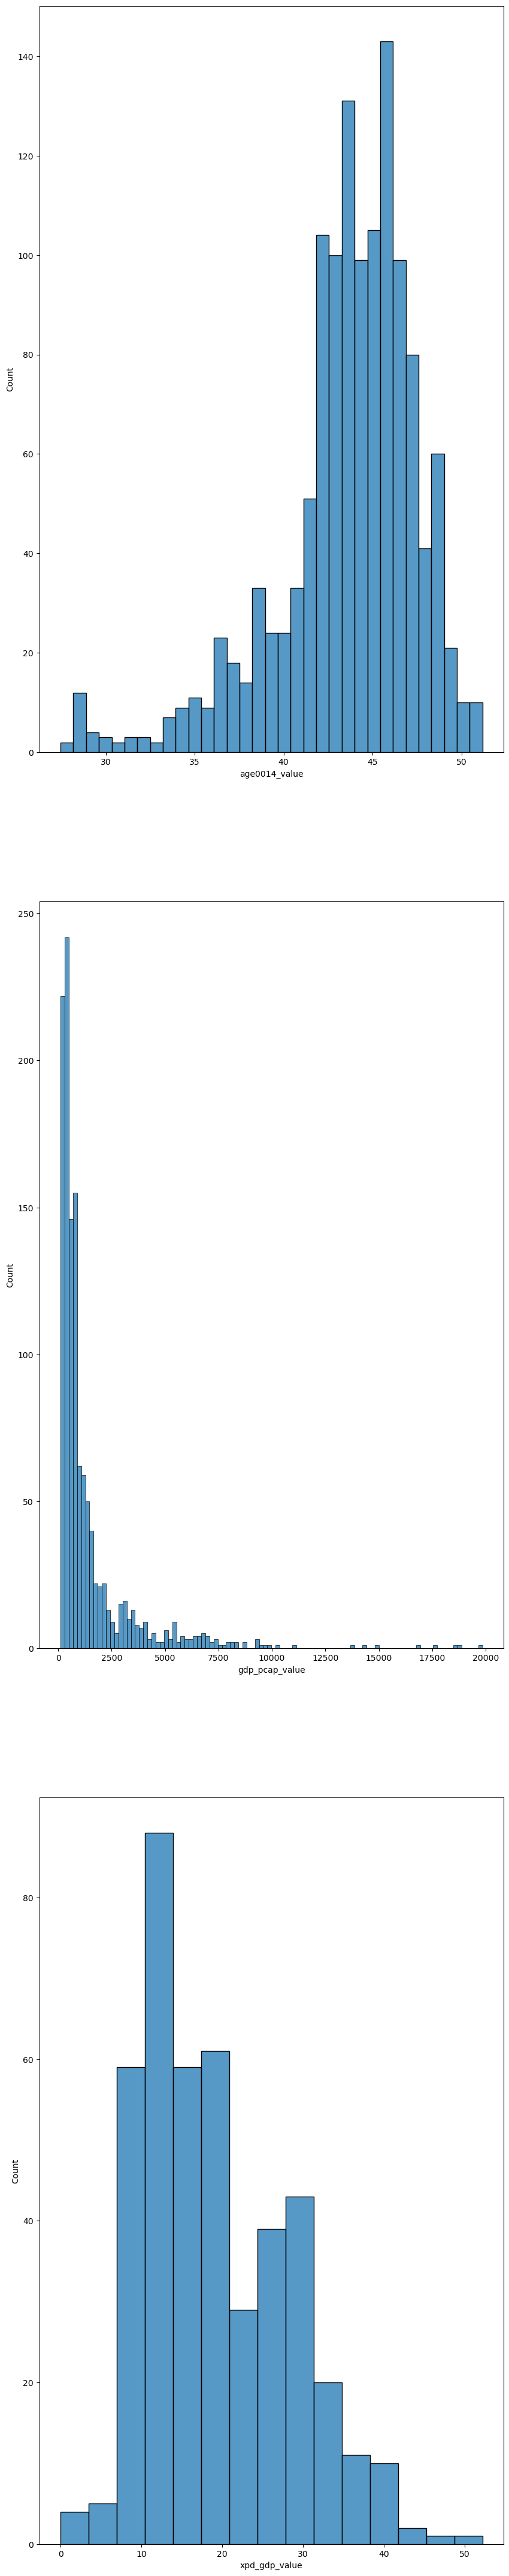

In [16]:
#get a histogram
#create histograms for all mean variables
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_wdi['age0014_value'],ax=axes[0])
sns.histplot(data_wdi['gdp_pcap_value'],ax=axes[1])
sns.histplot(data_wdi['xpd_gdp_value'],ax=axes[2])
plt.savefig('wdi1.png')

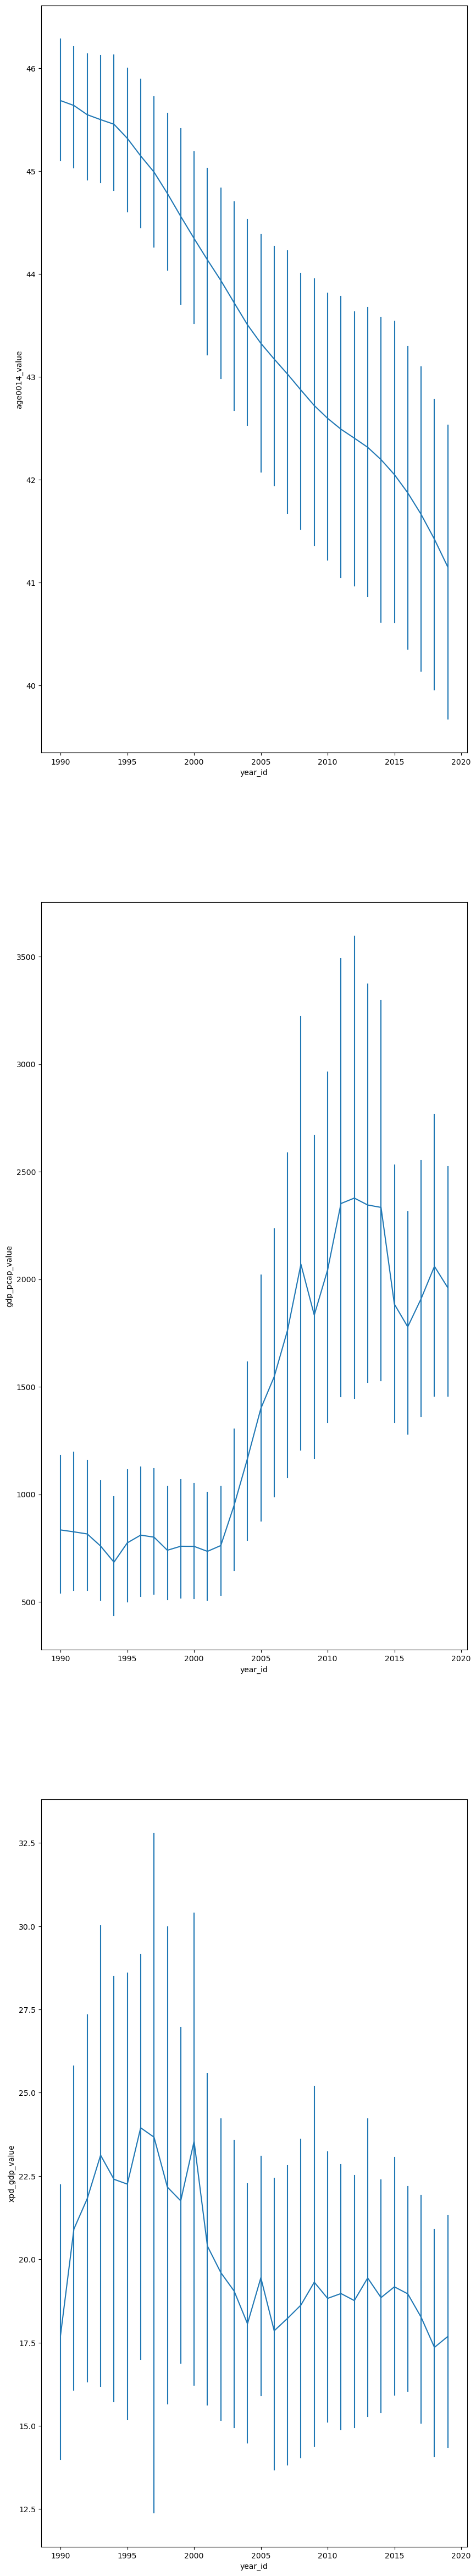

In [17]:
#create trendlines
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.lineplot(x='year_id',y='age0014_value',data=data_wdi,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='gdp_pcap_value',data=data_wdi,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='xpd_gdp_value',data=data_wdi,err_style='bars',ax=axes[2])

plt.savefig('wdi2.png')

In [18]:
#logtransform the wdi_gdp variable
data_wdi['gdp_log'] = np.log(data_wdi['gdp_pcap_value'])
data_wdi

,iso,year_id,age0014_value,gdp_pcap_value,xpd_gdp_value,gdp_log
7984,AGO,1990,46.586185,949.286381,NaN,6.855711
7996,BDI,1990,48.475941,206.444928,NaN,5.330034
7998,BEN,1990,45.603014,381.805039,NaN,5.944910
7999,BFA,1990,46.868240,339.631808,NaN,5.827862
8013,BWA,1990,45.435804,2825.673142,26.681603,7.946502
...,...,...,...,...,...,...
15926,TGO,2019,40.716202,875.932659,12.973913,6.775289
15941,UGA,2019,46.200731,823.138950,13.515074,6.713125
15957,ZAF,2019,28.745269,6688.787271,35.726235,8.808188
15958,ZMB,2019,44.099904,1268.120941,21.956163,7.145292


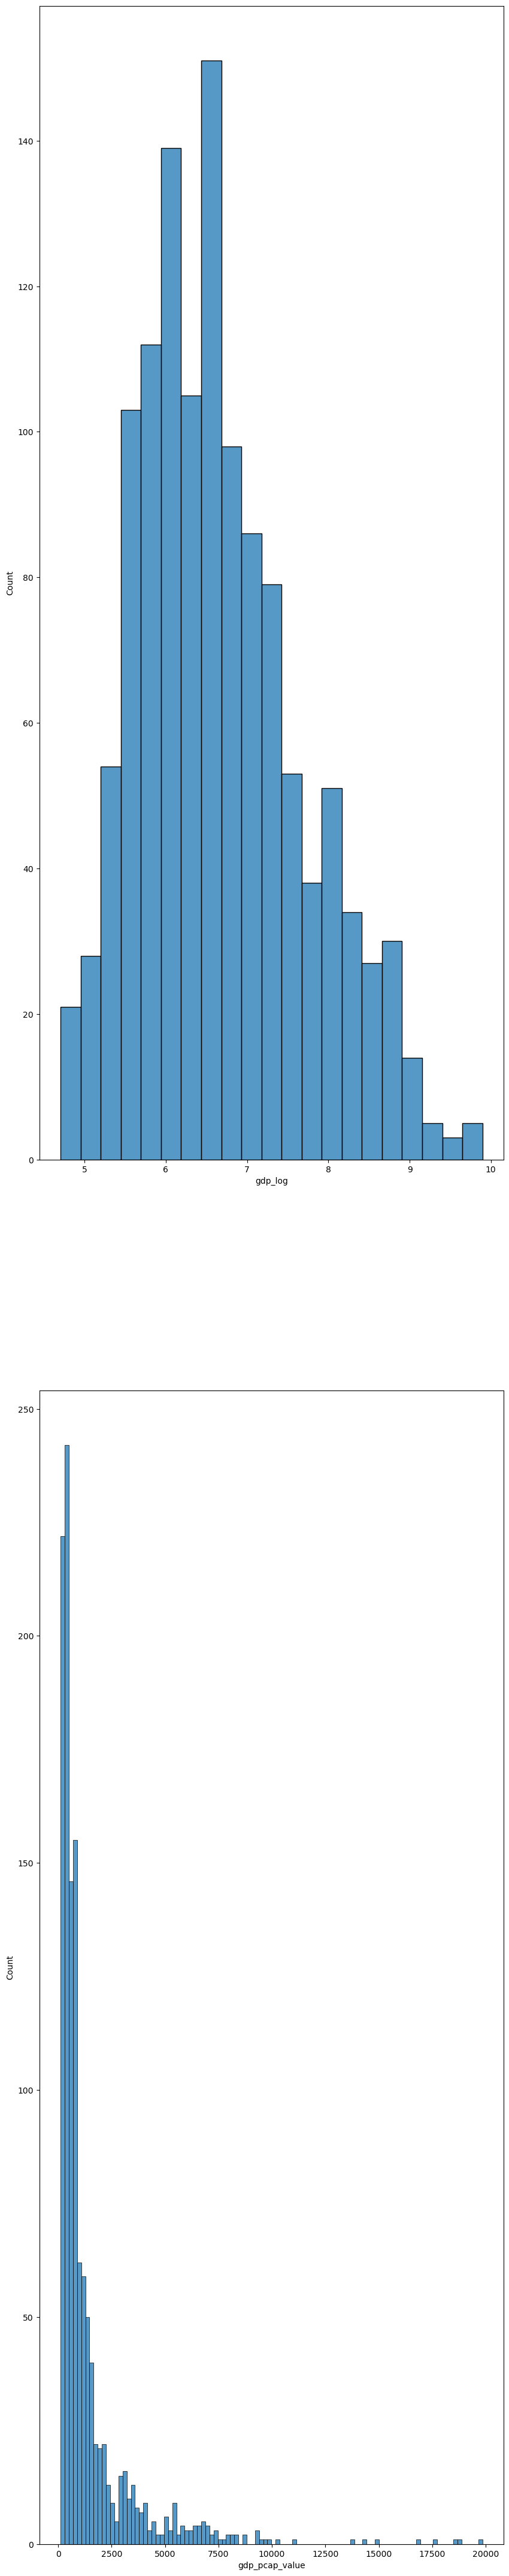

In [19]:
#compare skewed and logtransformed gdp
figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_wdi['gdp_log'],ax=axes[0])
sns.histplot(data_wdi['gdp_pcap_value'],ax=axes[1])
plt.savefig('wdi_log.png')

In [20]:
#save to csv
data_wdi.to_csv('data_wdi.csv')

## 2. Development assistance to health

In [21]:
#load data (already cleaned up)
data_dah = pd.read_csv('DAH.csv')
display(data_dah)

,Unnamed: 0,country,year_id,iso,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid
0,0,Afghanistan,1990,AFG,0,0,64005.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,0.0,63812.0
1,1,Afghanistan,1991,AFG,0,0,44222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44131.0
2,2,Afghanistan,1992,AFG,1,0,18503.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17253.0
3,3,Afghanistan,1993,AFG,1,0,13531.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13521.0
4,4,Afghanistan,1994,AFG,1,0,2105.0,155.0,340.0,2.0,0.0,0.0,4.0,118.0,0.0,1353.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,4512,Zimbabwe,2014,ZWE,87,0,366808.0,55318.0,46085.0,212254.0,34890.0,8450.0,573.0,799.0,0.0,6066.0
4513,4513,Zimbabwe,2015,ZWE,80,0,491662.0,53583.0,86006.0,294420.0,33059.0,13915.0,1239.0,1720.0,0.0,4014.0
4514,4514,Zimbabwe,2016,ZWE,89,0,385735.0,34939.0,52061.0,223305.0,38019.0,14030.0,524.0,1343.0,0.0,19902.0
4515,4515,Zimbabwe,2017,ZWE,75,27,436510.0,25122.0,122226.0,206333.0,39998.0,21187.0,2762.0,1907.0,0.0,14835.0


In [22]:
data_dah = data_dah.loc[data_dah['iso'].isin(['BWA',
 'MRT',
 'CPV',
 'UGA',
 'ZMB',
 'NER',
 'BDI',
 'TCD',
 'SOM',
 'AGO',
 'CAF',
 'MDG',
 'COG',
 'COM',
 'DJI',
 'MOZ',
 'CIV',
 'NGA',
 'BEN',
 'SWZ',
 'MWI',
 'GMB',
 'ERI',
 'ZWE',
 'GNQ',
 'GAB',
 'RWA',
 'GIN',
 'GHA',
 'CMR',
 'LSO',
 'SEN',
 'STP',
 'SLE',
 'GNB',
 'KEN',
 'TGO',
 'ETH',
 'BFA',
 'LBR',
 'NAM',
 'ZAF','MLI'])]

In [23]:
custom_describe(data_dah)

,Unnamed: 0,year_id,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid
nullcounts,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
sum,2.602015e+06,2.482904e+06,49438.000000,2315.000000,1.505554e+08,1.506276e+07,2.122975e+07,5.596340e+07,1.464934e+07,4.440700e+06,715325.000000,6.236766e+06,33749.000000,2.005576e+07
mean,2.100093e+03,2.003958e+03,39.901533,1.868442,1.215136e+05,1.215719e+04,1.713459e+04,4.516820e+04,1.182352e+04,3.584100e+03,577.340597,5.033709e+03,27.238902,1.618706e+04
median,2.080000e+03,2.004000e+03,19.000000,0.000000,4.088000e+04,2.876000e+03,2.883000e+03,6.490000e+03,6.090000e+02,1.800000e+02,43.000000,9.290000e+02,0.000000,7.438000e+03
max,4.516000e+03,2.018000e+03,129.000000,36.000000,1.577709e+06,2.352610e+05,5.422260e+05,6.637850e+05,3.060600e+05,1.671940e+05,32493.000000,4.547380e+05,27806.000000,2.503840e+05


In [24]:
data_dah.columns

Index(['Unnamed: 0', 'country', 'year_id', 'iso', 'ihme_dah_elim_ch',
       'ihme_dah_prelim_est', 'ihme_dah_total_aid', 'ihme_dah_rmh_aid',
       'ihme_dah_nch_aid', 'ihme_dah_hiv_aid', 'ihme_dah_mal_aid',
       'ihme_dah_tb_aid', 'ihme_dah_ncd_aid', 'ihme_dah_oid_aid',
       'ihme_dah_unalloc_aid', 'ihme_dah_other_aid'],
      dtype='object')

In [25]:
#check for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_dah.columns:
    pct_missing= np.mean(data_dah[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,Unnamed: 0,0.0
1,country,0.0
2,year_id,0.0
3,iso,0.0
4,ihme_dah_elim_ch,0.0
5,ihme_dah_prelim_est,0.0
6,ihme_dah_total_aid,0.0
7,ihme_dah_rmh_aid,0.0
8,ihme_dah_nch_aid,0.0
9,ihme_dah_hiv_aid,0.0


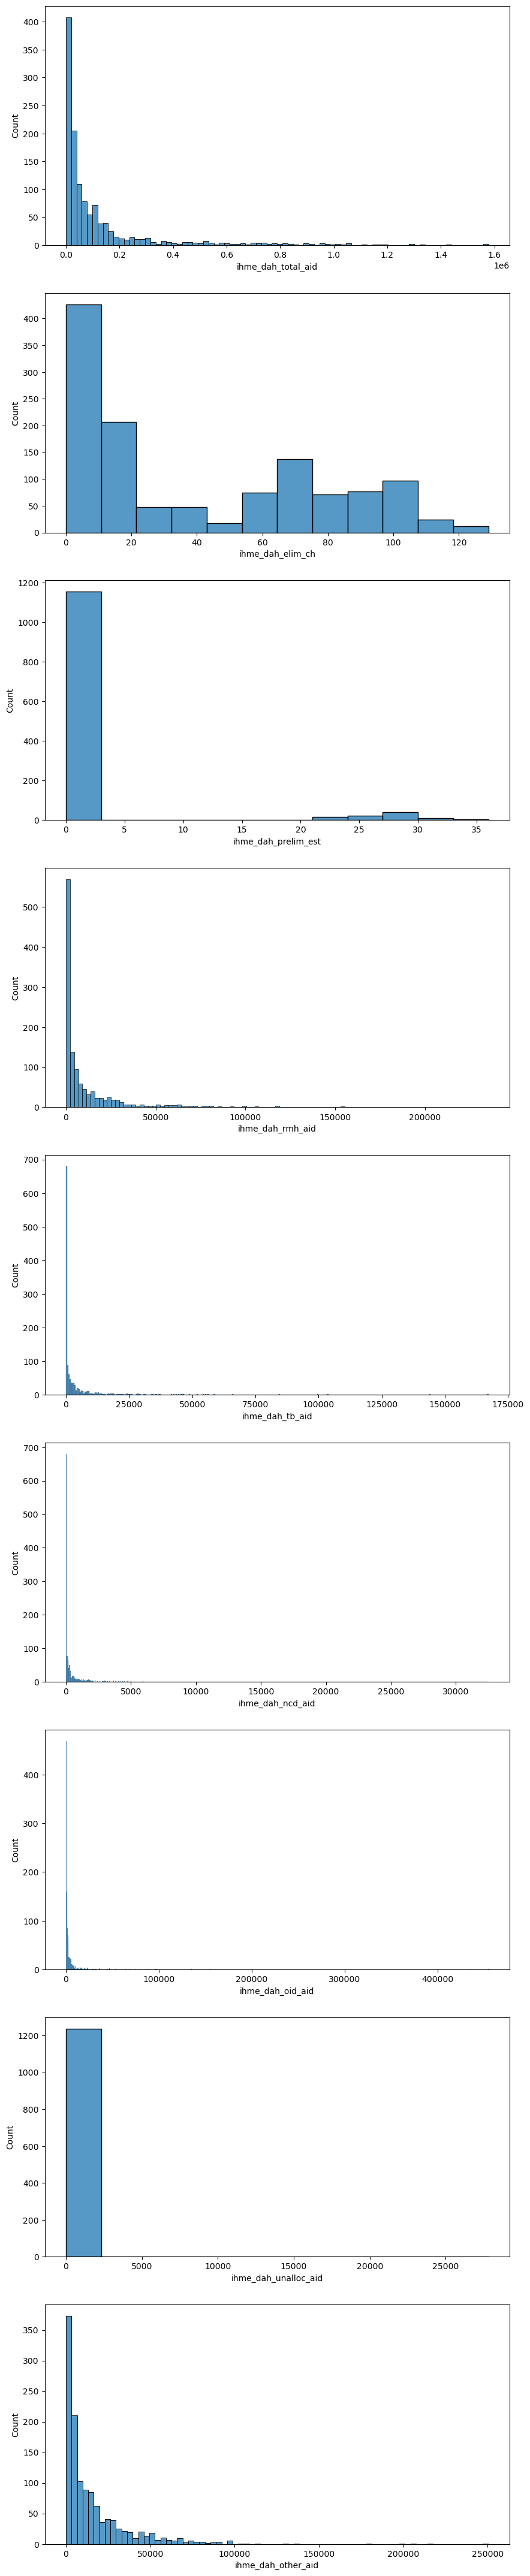

In [26]:
#create histograms for all mean variables
figure, axes = plt.subplots(9,1,figsize=(10,55))
sns.histplot(data_dah['ihme_dah_total_aid'],ax=axes[0])
sns.histplot(data_dah['ihme_dah_elim_ch'],ax=axes[1])
sns.histplot(data_dah['ihme_dah_prelim_est'],ax=axes[2])
sns.histplot(data_dah['ihme_dah_rmh_aid'],ax=axes[3])
sns.histplot(data_dah['ihme_dah_tb_aid'],ax=axes[4])
sns.histplot(data_dah['ihme_dah_ncd_aid'],ax=axes[5])
sns.histplot(data_dah['ihme_dah_oid_aid'],ax=axes[6])
sns.histplot(data_dah['ihme_dah_unalloc_aid'],ax=axes[7])
sns.histplot(data_dah['ihme_dah_other_aid'],ax=axes[8])
plt.savefig('dah1.png')

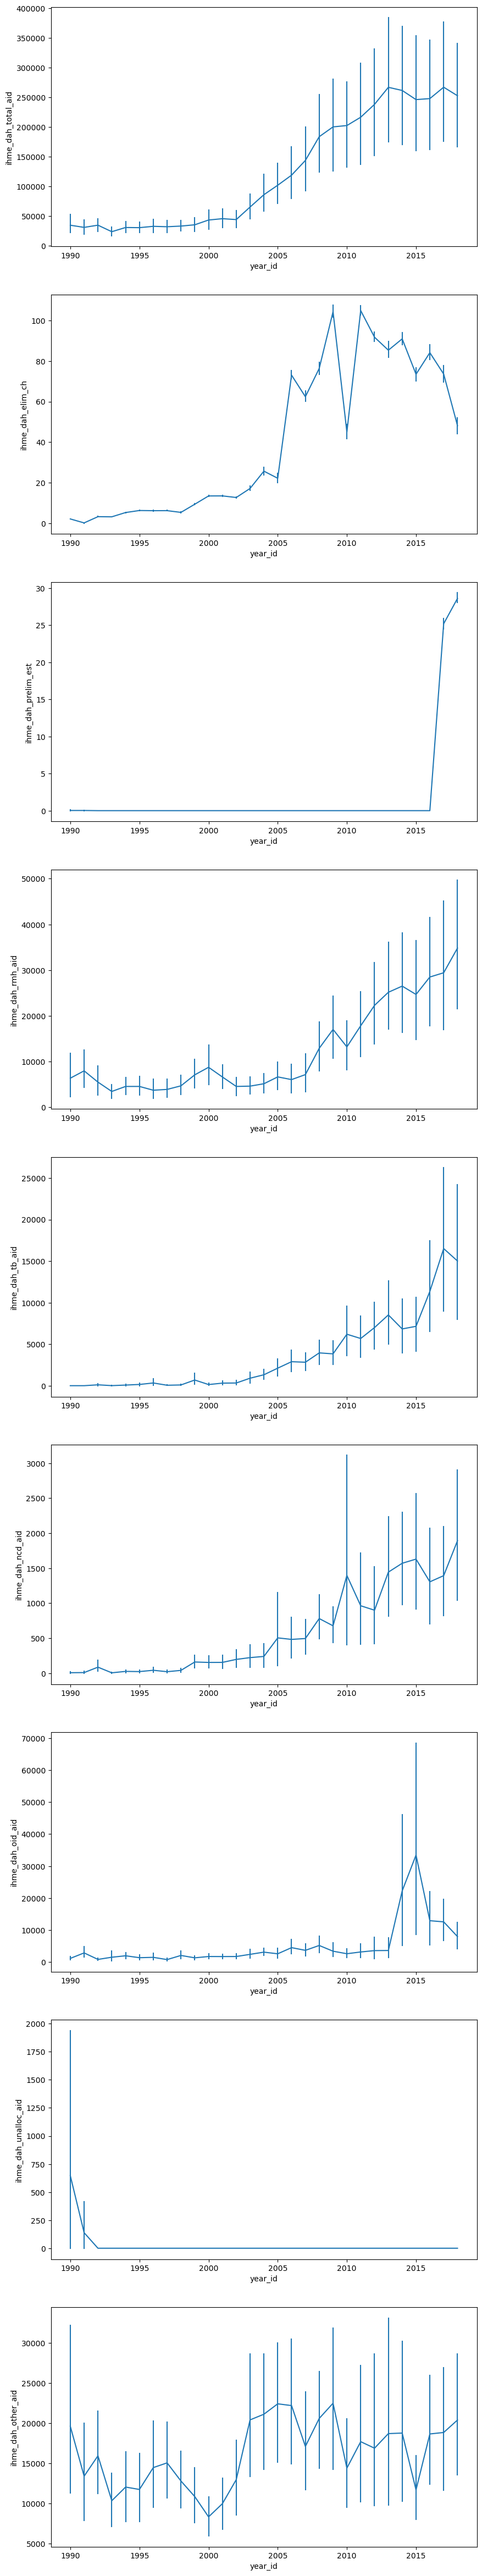

In [27]:
#create trendlines
figure, axes = plt.subplots(9,1,figsize=(10,60))
sns.lineplot(x='year_id',y='ihme_dah_total_aid',data=data_dah,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='ihme_dah_elim_ch',data=data_dah,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='ihme_dah_prelim_est',data=data_dah,err_style='bars',ax=axes[2])
sns.lineplot(x='year_id',y='ihme_dah_rmh_aid',data=data_dah,err_style='bars',ax=axes[3])
sns.lineplot(x='year_id',y='ihme_dah_tb_aid',data=data_dah,err_style='bars',ax=axes[4])
sns.lineplot(x='year_id',y='ihme_dah_ncd_aid',data=data_dah,err_style='bars',ax=axes[5])
sns.lineplot(x='year_id',y='ihme_dah_oid_aid',data=data_dah,err_style='bars',ax=axes[6])
sns.lineplot(x='year_id',y='ihme_dah_unalloc_aid',data=data_dah,err_style='bars',ax=axes[7])
sns.lineplot(x='year_id',y='ihme_dah_other_aid',data=data_dah,err_style='bars',ax=axes[8])

plt.savefig('dah2.png')

,Unnamed: 0,country,year_id,iso,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid,dah_total_log
87,87,Angola,1990,AGO,2,0,21733.0,3326.0,6.0,260.0,3.0,0.0,0.0,1980.0,0.0,15126.0,9.986587
88,88,Angola,1991,AGO,0,0,29906.0,3730.0,7.0,382.0,0.0,0.0,0.0,2366.0,0.0,7628.0,10.305814
89,89,Angola,1992,AGO,3,0,26620.0,2172.0,344.0,288.0,3.0,0.0,7.0,2237.0,0.0,16283.0,10.189418
90,90,Angola,1993,AGO,3,0,14315.0,1667.0,91.0,151.0,2.0,0.0,0.0,970.0,0.0,10790.0,9.569063
91,91,Angola,1994,AGO,5,0,11775.0,2479.0,54.0,1742.0,5.0,0.0,0.0,1259.0,0.0,4938.0,9.373734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,4512,Zimbabwe,2014,ZWE,87,0,366808.0,55318.0,46085.0,212254.0,34890.0,8450.0,573.0,799.0,0.0,6066.0,12.812594
4513,4513,Zimbabwe,2015,ZWE,80,0,491662.0,53583.0,86006.0,294420.0,33059.0,13915.0,1239.0,1720.0,0.0,4014.0,13.105547
4514,4514,Zimbabwe,2016,ZWE,89,0,385735.0,34939.0,52061.0,223305.0,38019.0,14030.0,524.0,1343.0,0.0,19902.0,12.862906
4515,4515,Zimbabwe,2017,ZWE,75,27,436510.0,25122.0,122226.0,206333.0,39998.0,21187.0,2762.0,1907.0,0.0,14835.0,12.986567


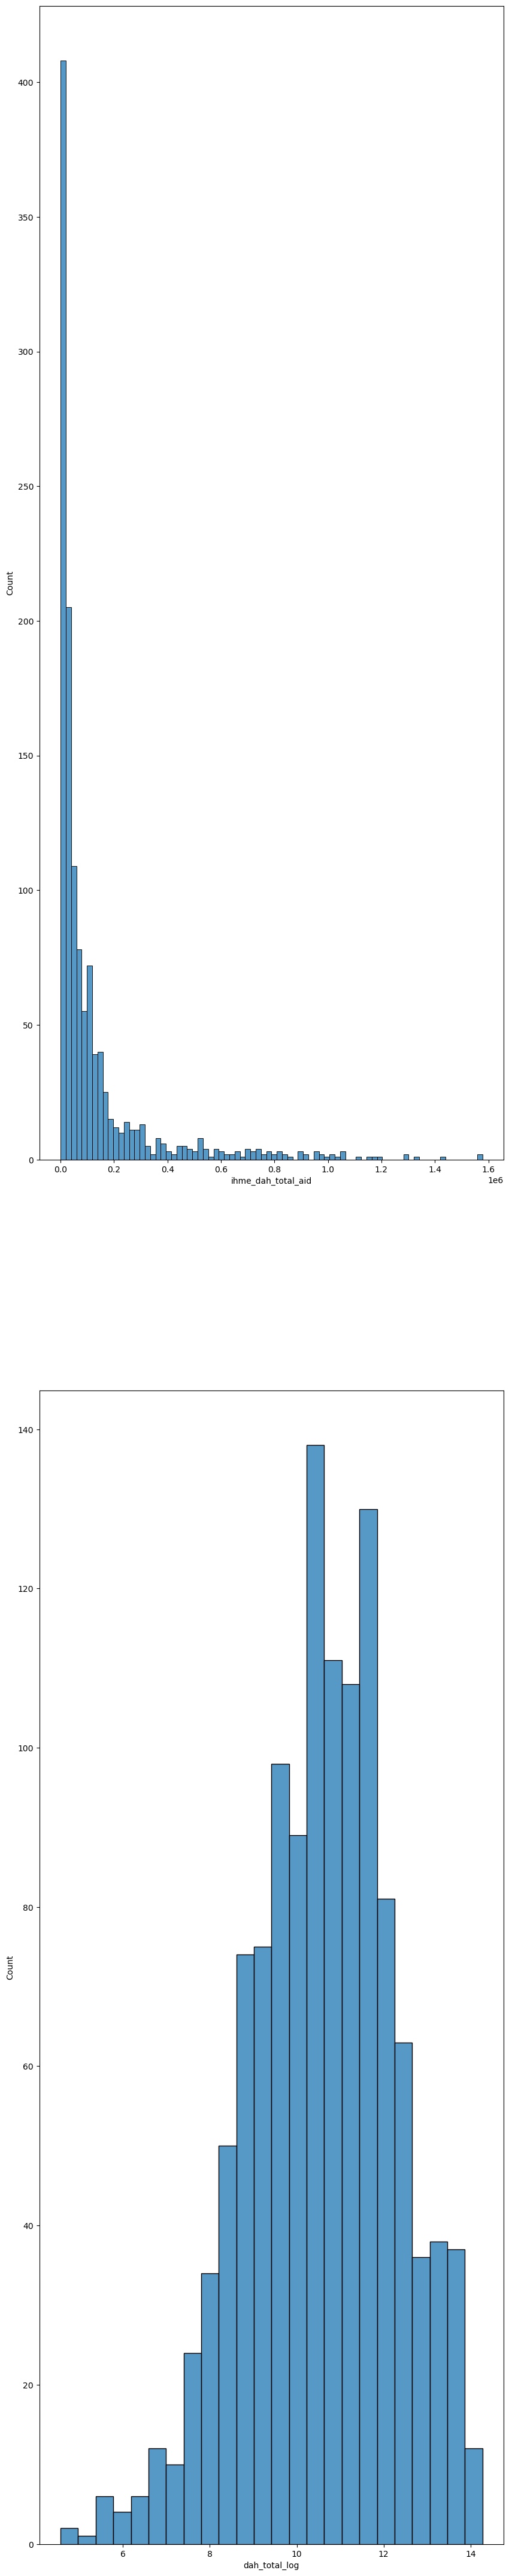

In [28]:
#logtransform the aid
data_dah['dah_total_log'] = np.log(data_dah['ihme_dah_total_aid'])
display(data_dah)

figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_dah['ihme_dah_total_aid'],ax=axes[0])
sns.histplot(data_dah['dah_total_log'],ax=axes[1])

plt.savefig('dah_log.png')

In [29]:
data_dah.to_csv('data_dah.csv')

## 3.  WASH, ND-GAIN country indicators

In [30]:
#load data
data_water = pd.read_csv('access_drink.csv')
data_sani = pd.read_csv('access_sani.csv')
display(data_water, data_sani)

,ISO3,Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,10.927531,10.927531,10.927531,10.927531,10.927531,10.927531,10.938792,11.725373,...,19.966875,20.818832,21.671018,22.523437,23.376206,24.229208,25.083892,25.940512,26.798956,27.588956
1,ALB,Albania,49.138321,49.138321,49.138321,49.138321,49.138321,49.138321,49.081199,48.984765,...,64.327401,66.380852,68.459832,70.563260,70.591971,70.616508,70.636942,70.653350,70.665854,70.674537
2,DZA,Algeria,70.078517,70.078517,70.078517,70.078517,70.078517,70.078517,70.642182,71.191853,...,75.469921,75.867626,76.250145,75.971789,75.534372,75.068531,74.574965,73.879833,73.139746,72.381456
3,AND,Andorra,90.640001,90.640001,90.640001,90.640001,90.640001,90.640001,90.639999,90.640002,...,90.639998,90.640003,90.639996,90.640001,90.639998,90.639996,90.639999,90.640001,90.640003,90.640003
4,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VEN,"Venezuela, Bolivarian Republic o",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,VNM,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,YEM,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,ZMB,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ISO3,Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,Albania,40.237416,40.237416,40.237416,40.237416,40.237416,40.237416,40.520895,40.808202,...,44.733594,45.154840,45.561574,45.954062,46.333013,46.698890,47.052290,47.393845,47.577141,47.691082
2,DZA,Algeria,21.514720,21.514720,21.514720,21.514720,21.514720,21.514720,21.351868,21.187954,...,19.677090,19.445413,19.214180,18.983353,18.753132,18.523473,18.294577,18.066395,17.839063,17.612590
3,AND,Andorra,14.604036,14.604036,14.604036,14.604036,14.604036,14.604036,21.788660,28.973285,...,93.634905,100.000004,99.999995,100.000001,99.999998,99.999995,99.999999,100.000001,100.000004,100.000004
4,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VEN,"Venezuela, Bolivarian Republic o",21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,...,21.152327,21.365023,21.577719,21.790415,22.003111,22.215806,22.428502,22.641198,22.853894,23.066590
188,VNM,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,YEM,Yemen,24.771589,24.771589,24.771589,24.771589,24.771589,24.771589,24.890676,25.011545,...,19.724307,19.088029,18.448936,17.806700,17.431739,17.724536,18.011676,18.292967,18.568462,18.837979
190,ZMB,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#stack, filter and rename the columns
##rename
data_water = data_water.rename(columns= {'ISO3':'iso'})
data_sani = data_sani.rename(columns= {'ISO3':'iso'})
##filter the needed columns
data_sani = data_sani.drop(columns=['Name'])
data_water = data_water.drop(columns=['Name'])
##stack the individual year columns
data_water = data_water.melt(id_vars='iso',var_name='year_id',value_name='access_drinkwater_index')
data_sani = data_sani.melt(id_vars='iso',var_name='year_id',value_name='access_sani_index')

In [32]:
display(data_sani.dtypes, data_water.dtypes)
data_water['year_id'] = data_water['year_id'].astype(str).astype(int)
data_sani['year_id'] = data_sani['year_id'].astype(str).astype(int)

iso                   object
year_id               object
access_sani_index    float64
dtype: object

iso                         object
year_id                     object
access_drinkwater_index    float64
dtype: object

In [33]:
data_wash = pd.merge(data_water,data_sani, how="outer", on=["iso", "year_id"])

In [34]:
#group by country-year & only filter iso for  SSA)
data_wash = data_wash.loc[data_wash['iso'].isin(['BWA',
 'MRT',
 'CPV',
 'UGA',
 'ZMB',
 'NER',
 'BDI',
 'TCD',
 'SOM',
 'AGO',
 'CAF',
 'MDG',
 'COG',
 'COM',
 'DJI',
 'MOZ',
 'CIV',
 'NGA',
 'BEN',
 'SWZ',
 'MWI',
 'GMB',
 'ERI',
 'ZWE',
 'GNQ',
 'GAB',
 'RWA',
 'GIN',
 'GHA',
 'CMR',
 'LSO',
 'SEN',
 'STP',
 'SLE',
 'GNB',
 'KEN',
 'TGO',
 'ETH',
 'BFA',
 'LBR',
 'NAM',
 'ZAF','MLI'])]
data_wash = data_wash.groupby(['iso','year_id']).sum().reset_index()
display(data_wash)

,iso,year_id,access_drinkwater_index,access_sani_index
0,AGO,1995,0.000000,0.000000
1,AGO,1996,0.000000,0.000000
2,AGO,1997,0.000000,0.000000
3,AGO,1998,0.000000,0.000000
4,AGO,1999,0.000000,0.000000
...,...,...,...,...
1113,ZWE,2016,30.183683,26.877909
1114,ZWE,2017,29.997683,26.576824
1115,ZWE,2018,29.827913,26.272073
1116,ZWE,2019,29.673569,25.963544


In [35]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_wash.columns:
    pct_missing= np.mean(data_wash[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,iso,0.0
1,year_id,0.0
2,access_drinkwater_index,0.0
3,access_sani_index,0.0


In [36]:
custom_describe(data_wash)

,year_id,access_drinkwater_index,access_sani_index
nullcounts,0.0,0.000000,0.000000
sum,2244385.0,8068.379928,8226.389499
mean,2007.5,7.216798,7.358130
median,2007.5,0.000000,0.000000
max,2020.0,45.896896,47.621688


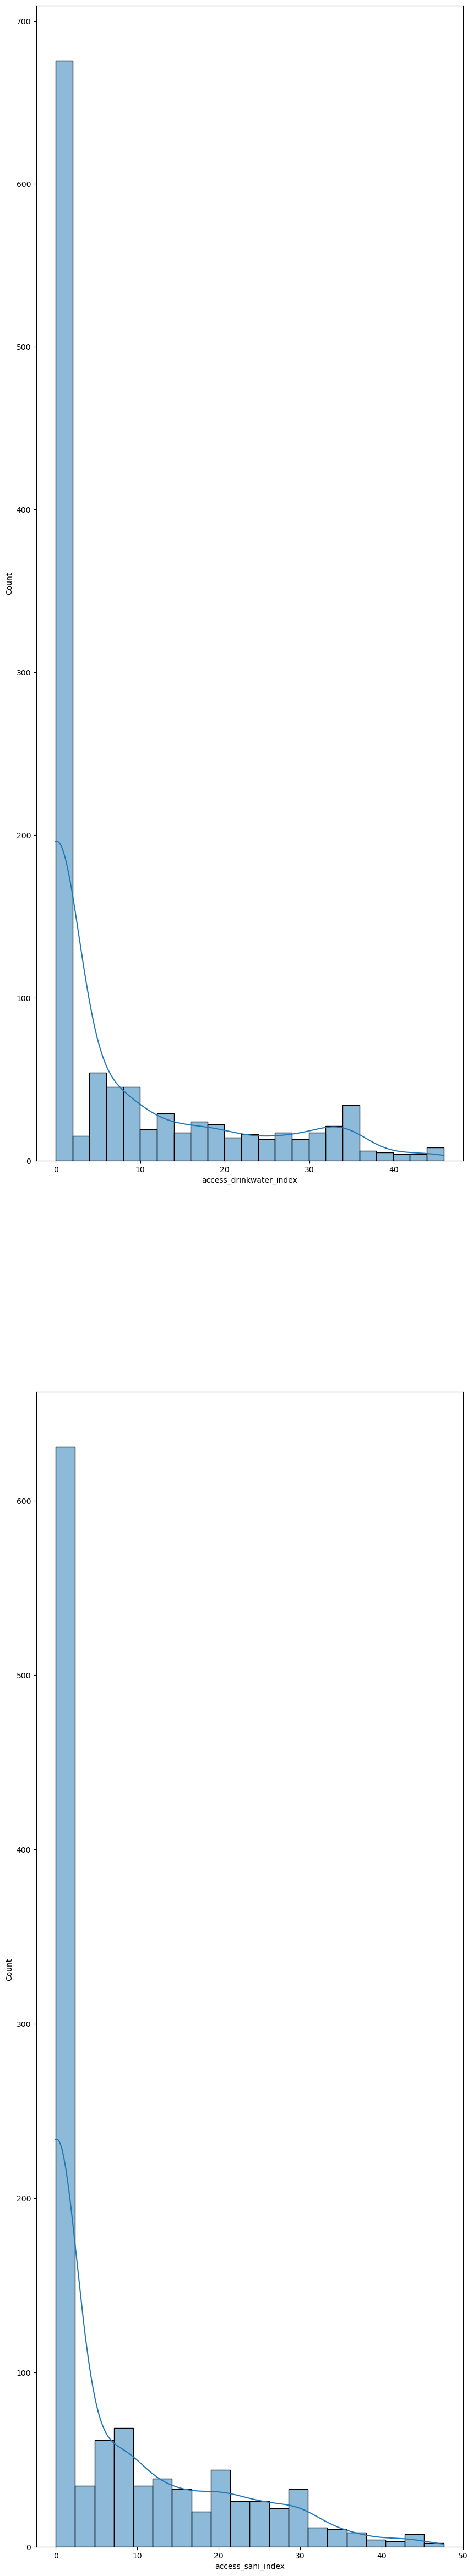

In [37]:
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.histplot(data_wash['access_drinkwater_index'],kde = True,ax=axes[0])
sns.histplot(data_wash['access_sani_index'],kde = True,ax=axes[1])

plt.savefig('wash1.png')

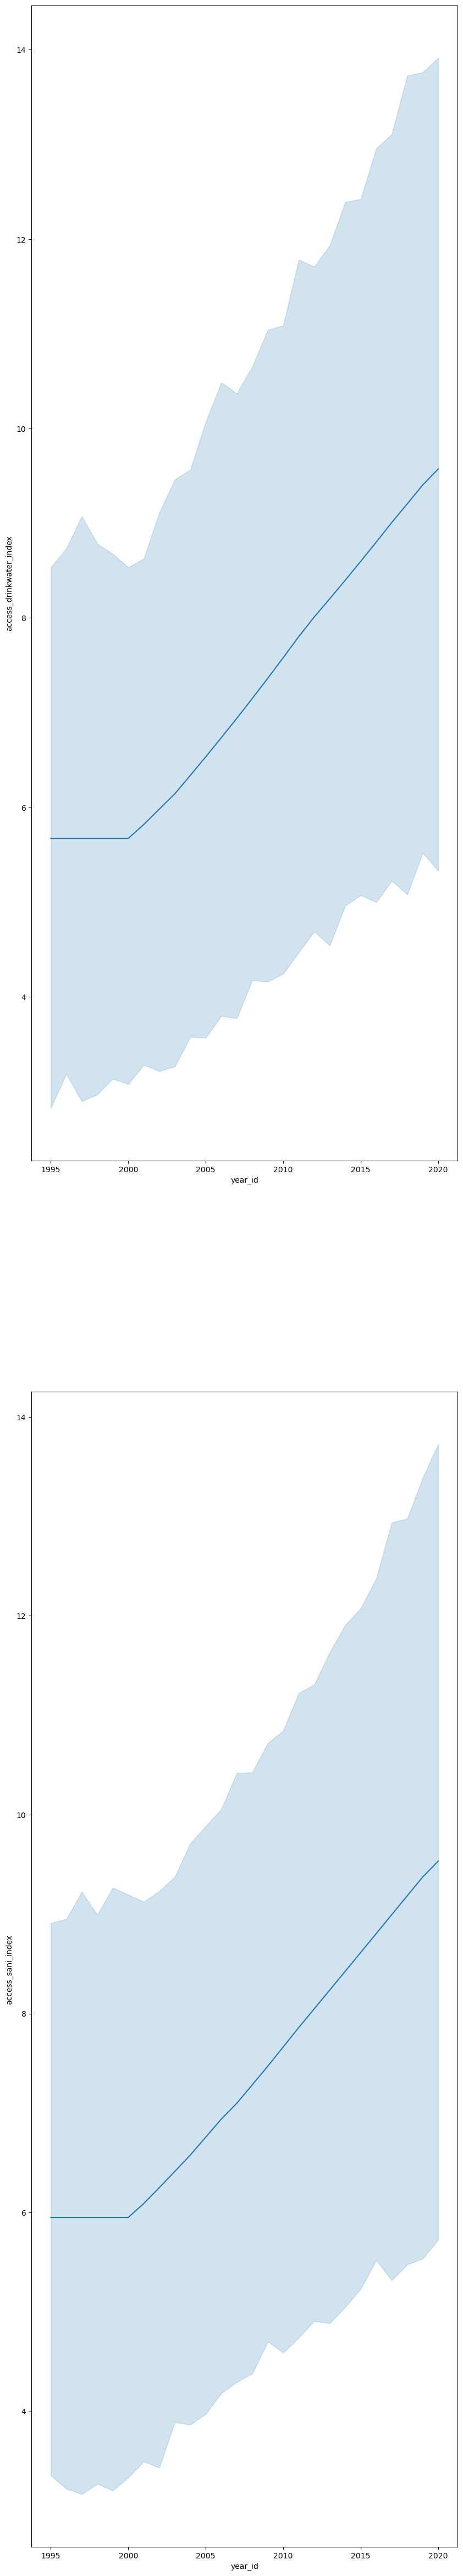

In [38]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.lineplot(x='year_id',y='access_drinkwater_index',data=data_wash,ax=axes[0])
sns.lineplot(x='year_id',y='access_sani_index',data=data_wash,ax=axes[1])

plt.savefig('wash2.png')

In [39]:
data_wash.to_csv('data_wash.csv')

## 4. Exposure and Vulnerability

In [40]:
def report(df):
    print()
    print(f"A dataset with {len(df.columns)} columns, with "
          f"data between t {min(df.index.get_level_values(0))} "
          f"and {max(df.index.get_level_values(0))}. "
          f"({len(np.unique(df.index.get_level_values(1)))} units)"
          )
    return

In [11]:
#look if the data is already in the views system
!viewser tables list


  > Tables
  ---------------------------------------------------------------------------------------
  | name                                    | path                                    |
  |:----------------------------------------|:----------------------------------------|
  | values_actor_pgm_actor_qlag2_tlag24     | values_actor_pgm_actor_qlag2_tlag24     |
  | values_actor_pgm_actor                  | values_actor_pgm_actor                  |
  | values_actor_pgm_actor_qlag1            | values_actor_pgm_actor_qlag1            |
  | values_actor_pgm_actor_qlag1_persistent | values_actor_pgm_actor_qlag1_persistent |
  | values_actor_pgm_actor_qlag1_tlag24     | values_actor_pgm_actor_qlag1_tlag24     |
  | values_actor_pgm_actor_qlag1_tlag6      | values_actor_pgm_actor_qlag1_tlag6      |
  | values_actor_pgm_actor_qlag2_persistent | values_actor_pgm_actor_qlag2_persistent |
  | values_actor_pgm_actor_persistent       | values_actor_pgm_actor_persistent       |
  | vdem_v12_healt

In [42]:
!viewser tables show gdis_pgy


  > Gdis_pgy
  -------------------------------------------------------------------------------
  | name                                | path                                |
  |:------------------------------------|:------------------------------------|
  | priogrid_year_id                    | priogrid_year_id                    |
  | gids_disastertype_join              | gids_disastertype_join              |
  | gids_total_deaths_mean              | gids_total_deaths_mean              |
  | gids_total_affected_mean            | gids_total_affected_mean            |
  | gids_no_injured_mean                | gids_no_injured_mean                |
  | gids_disasterno_nunique             | gids_disasterno_nunique             |
  | gids_disasterno_count               | gids_disasterno_count               |
  | gids_distype_drought_sum            | gids_distype_drought_sum            |
  | gids_distype_earthquake_sum         | gids_distype_earthquake_sum         |
  | gids_distype_extreme

In [43]:
#define the preliminers t (1990 till 2019) and c_ids
#transform pgy into cy
data_disaster = (Queryset("gdis_pgy", "priogrid_year")
                 .with_column(Column("gdis_count", from_table="gdis_pgy", from_column="gids_disasterno_count"))
                # .agggregate('sum')
                 .with_column(Column("gdis_nunique", from_table="gdis_pgy", from_column="gids_disasterno_nunique"))
                # .agggregate('sum')
                 .with_column(Column("gdis_type", from_table="gdis_pgy", from_column="gids_disastertype_join")))


data_disaster = data_disaster.publish().fetch()

data_disaster

 .    

gdis_count  gdis_nunique gdis_type
year_id priogrid_gid                                    
1980    49182                0.0           0.0          
        49183                0.0           0.0          
        49184                0.0           0.0          
        49185                0.0           0.0          
        49186                0.0           0.0          
...                          ...           ...       ...
2050    249340               NaN           NaN      None
        249341               NaN           NaN      None
        249342               NaN           NaN      None
        249343               NaN           NaN      None
        249344               NaN           NaN      None

[4602078 rows x 3 columns]

In [44]:
data_disaster= data_disaster.reset_index()
data_disaster = data_disaster.rename(columns={'priogrid_gid':'pg_id'})
data_disaster = data_disaster[data_disaster['year_id'] <=2019] 
data_disaster = data_disaster[data_disaster['year_id'] >=1990] 
data_disaster = data_disaster[(data_disaster.pgy.lon.between(-10,40)) & (data_disaster.pgy.lat.between(-35,+35))]
#filter in africa
data_disaster

,year_id,pg_id,gdis_count,gdis_nunique,gdis_type
649526,1990,79599,0.0,0.0,
649527,1990,79600,0.0,0.0,
649528,1990,79601,0.0,0.0,
649610,1990,80317,1.0,1.0,drought
649611,1990,80318,1.0,1.0,drought
...,...,...,...,...,...
2558136,2019,179716,NaN,NaN,None
2558137,2019,179717,NaN,NaN,None
2558138,2019,179718,NaN,NaN,None
2558139,2019,179719,NaN,NaN,None


In [45]:
# Look how easy it is to convert a PGY df to a CY dataframe. Ready for aggregation!
data_disaster['c_id'] = data_disaster.pgy.c_id
data_disaster

KeyboardInterrupt: 

In [ ]:
#get the iso numbers
data_disaster['iso'] = data_disaster.c.isoab
data_disaster

In [ ]:
inspect = data_disaster.loc[data_disaster.iso.isna()]
display(inspect)

In [56]:
data_disaster = data_disaster.loc[data_disaster['iso'].isin(['BWA',
 'MRT',
 'CPV',
 'UGA',
 'ZMB',
 'NER',
 'BDI',
 'TCD',
 'SOM',
 'AGO',
 'CAF',
 'MDG',
 'COG',
 'COM',
 'DJI',
 'MOZ',
 'CIV',
 'NGA',
 'BEN',
 'SWZ',
 'MWI',
 'GMB',
 'ERI',
 'ZWE',
 'GNQ',
 'GAB',
 'RWA',
 'GIN',
 'GHA',
 'CMR',
 'LSO',
 'SEN',
 'STP',
 'SLE',
 'GNB',
 'KEN',
 'TGO',
 'ETH',
 'BFA',
 'LBR',
 'NAM',
 'ZAF','MLI'])]
data_disaster = data_disaster.groupby(['iso','year_id']).sum().reset_index()
display(data_disaster)

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_36242/1207383101.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_disaster = data_disaster.groupby(['iso','year_id']).sum().reset_index()


,iso,year_id,gdis_count,gdis_nunique,c_id
0,AGO,1990,13.0,13.0,71775
1,AGO,1991,0.0,0.0,71775
2,AGO,1992,11.0,11.0,71775
3,AGO,1993,0.0,0.0,71775
4,AGO,1994,0.0,0.0,71775
...,...,...,...,...,...
1012,ZWE,2015,59.0,57.0,21330
1013,ZWE,2016,42.0,38.0,21330
1014,ZWE,2017,261.0,117.0,21330
1015,ZWE,2018,19.0,19.0,21330


In [58]:
#clean up columns
data_disaster = data_disaster.drop(columns={'c_id'})

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


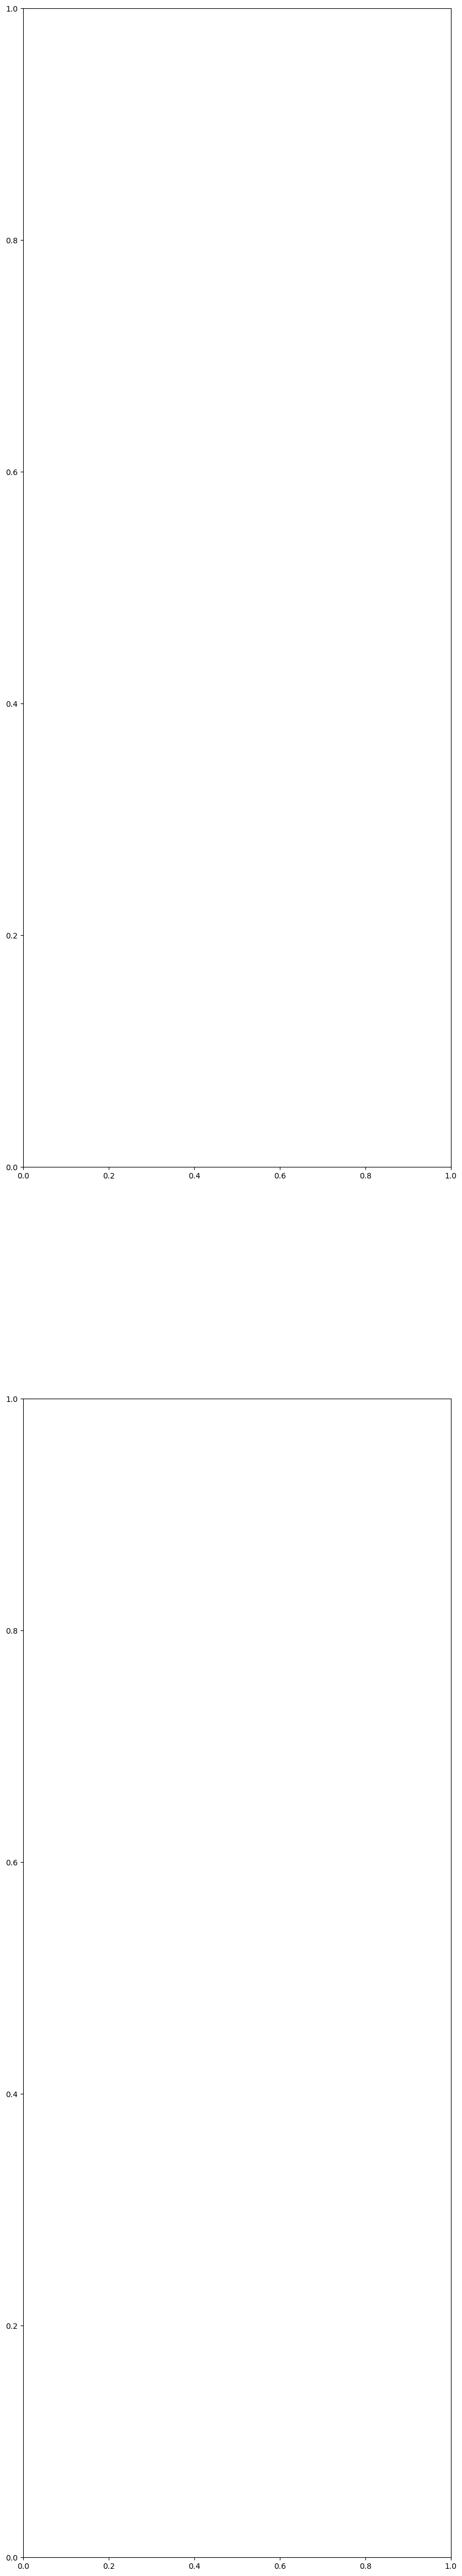

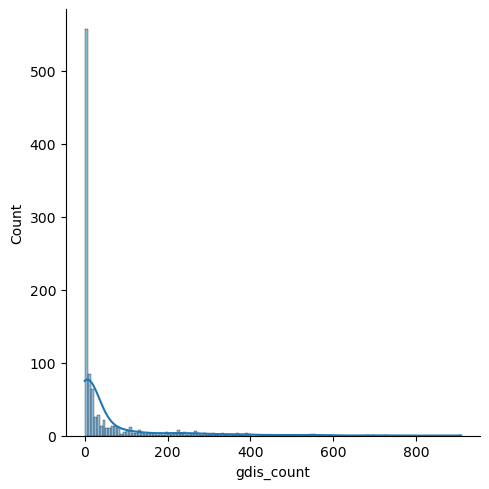

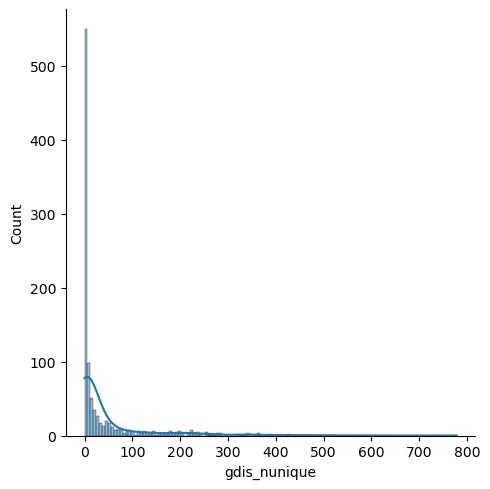

In [60]:
#example distribution plot with kernel densities
%matplotlib inline 
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.displot(data_disaster['gdis_count'],kde=True,ax=axes[0])
sns.displot(data_disaster['gdis_nunique'],kde=True,ax=axes[1])
plt.savefig('data_disaster1.png')

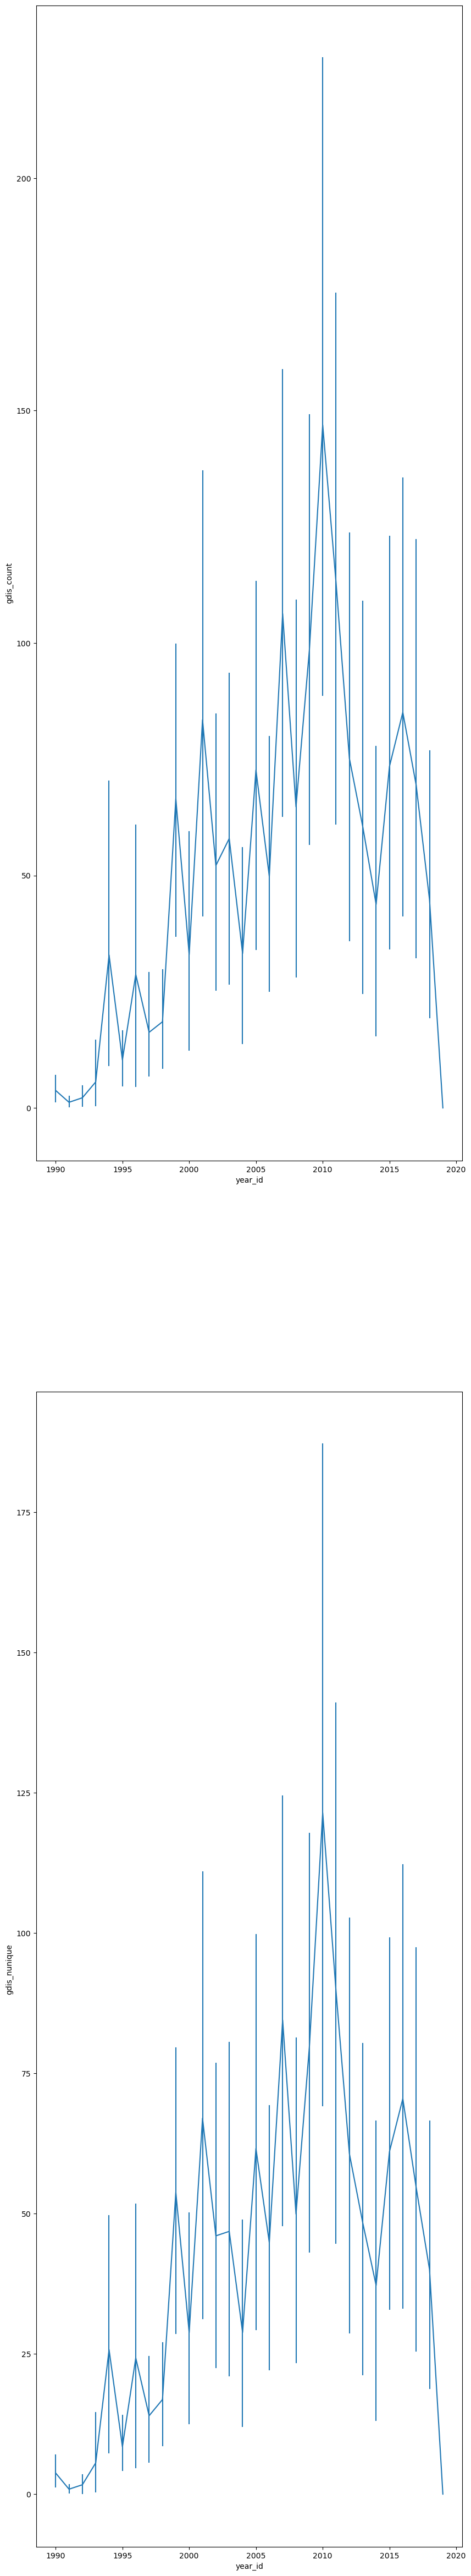

In [61]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))

sns.lineplot(x='year_id',y='gdis_count',data=data_disaster,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='gdis_nunique',data=data_disaster,err_style='bars',ax=axes[1])
plt.savefig('data_disaster2.png')

In [62]:
#test for missingness
values_list = list()
cols_list = list() 
for col in data_disaster.columns:
    pct_missing= np.mean(data_disaster[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,iso,0.0
1,year_id,0.0
2,gdis_count,0.0
3,gdis_nunique,0.0


/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,iso,year_id,gdis_count,gdis_nunique,gdis_count_lag
0,AGO,1990,13.0,13.0,2.564949
1,AGO,1991,0.0,0.0,-inf
2,AGO,1992,11.0,11.0,2.397895
3,AGO,1993,0.0,0.0,-inf
4,AGO,1994,0.0,0.0,-inf
...,...,...,...,...,...
1012,ZWE,2015,59.0,57.0,4.077537
1013,ZWE,2016,42.0,38.0,3.737670
1014,ZWE,2017,261.0,117.0,5.564520
1015,ZWE,2018,19.0,19.0,2.944439


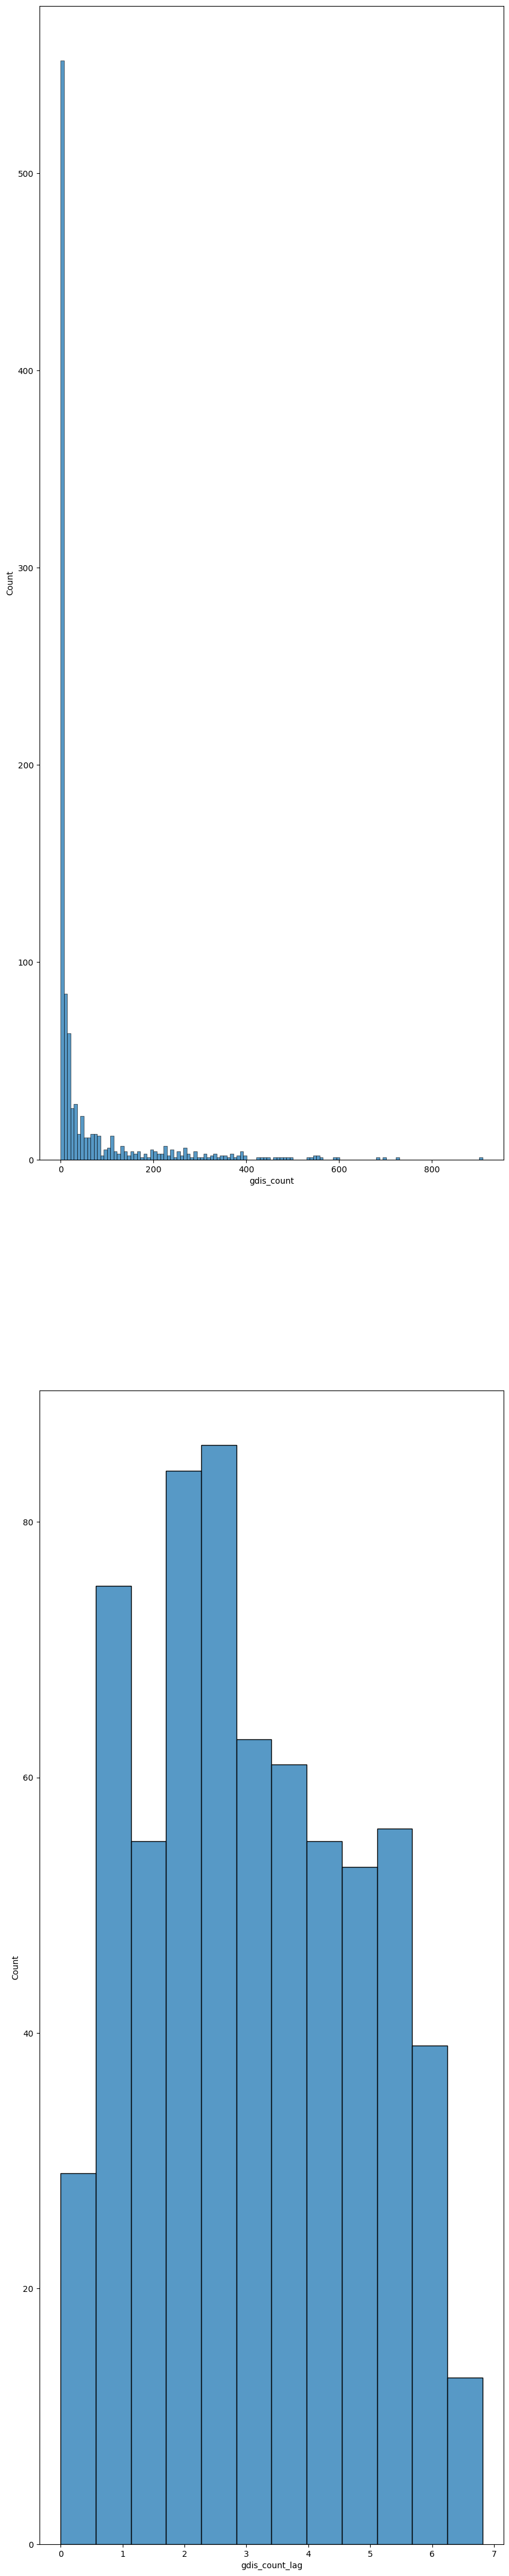

In [63]:
#logtransform the variable
data_disaster['gdis_count_lag'] = np.log(data_disaster['gdis_count'])
display(data_disaster)

figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_disaster['gdis_count'],ax=axes[0])
sns.histplot(data_disaster['gdis_count_lag'],ax=axes[1])

plt.savefig('disaster_log.png')

In [64]:
data_disaster.to_csv('data_disaster.csv')

# emdat data for vulnerability

In [6]:
import openpyxl
data_vn = openpyxl.load_workbook('emdat.xlsx')


In [7]:
data_vn

In [10]:
!viewser tables

Usage: viewser tables [OPTIONS] COMMAND [ARGS]...

  Commands used to inspect available tables and columns.

Options:
  --help  Show this message and exit.

Commands:
  annotate  add documentation text
  list      show available tables
  show      inspect table or column


In [46]:
data_vn = (Queryset("emdat_cy", "country_year")
                 .with_column(Column("emdat_totl_vn", from_table="emdat_cy", from_column="tot_affected_sum"))
                 .with_column(Column("emdat_totl_dead", from_table="emdat_cy", from_column="tot_death"))
                 .with_column(Column("emdat_totl_injury", from_table="emdat_cy", from_column="tot_injured")))

data_vn = data_vn.publish().fetch()

data_vn

 .      o   

emdat_totl_vn  emdat_totl_dead  emdat_totl_injury
year_id country_id                                                   
1980    1                     0.0              0.0                  0
        2                     0.0              0.0                  0
        3                     0.0              0.0                  0
        4                     0.0              0.0                  0
        5                     0.0              0.0                  0
...                           ...              ...                ...
2050    242                   0.0              0.0                  0
        243                   0.0              0.0                  0
        244                   0.0              0.0                  0
        245                   0.0              0.0                  0
        246                   0.0              0.0                  0

[13510 rows x 3 columns]

In [47]:
data_vn = data_vn.reset_index()
#rename the columns
data_vn = data_vn.rename(columns={'country_id':'c_id'})
#fix the temporal scope
data_vn = data_vn[data_vn['year_id'] >=1990] 
data_vn = data_vn[data_vn['year_id'] <=2019] 

In [65]:
data_vn['iso'] = data_vn.c.isoab

In [66]:
data_vn = data_vn.loc[data_vn['iso'].isin(['BWA',
 'MRT',
 'CPV',
 'UGA',
 'ZMB',
 'NER',
 'BDI',
 'TCD',
 'SOM',
 'AGO',
 'CAF',
 'MDG',
 'COG',
 'COM',
 'DJI',
 'MOZ',
 'CIV',
 'NGA',
 'BEN',
 'SWZ',
 'MWI',
 'GMB',
 'ERI',
 'ZWE',
 'GNQ',
 'GAB',
 'RWA',
 'GIN',
 'GHA',
 'CMR',
 'LSO',
 'SEN',
 'STP',
 'SLE',
 'GNB',
 'KEN',
 'TGO',
 'ETH',
 'BFA',
 'LBR',
 'NAM',
 'ZAF','MLI'])]
data_vn = data_vn.groupby(['iso','year_id']).sum().reset_index()
display(data_vn)

,iso,year_id,c_id,emdat_totl_vn,emdat_totl_dead,emdat_totl_injury
0,AGO,1990,165,0.0,0.0,0
1,AGO,1991,165,0.0,0.0,0
2,AGO,1992,165,0.0,0.0,0
3,AGO,1993,165,0.0,0.0,0
4,AGO,1994,165,0.0,0.0,0
...,...,...,...,...,...,...
1282,ZWE,2015,158,0.0,0.0,0
1283,ZWE,2016,158,0.0,0.0,0
1284,ZWE,2017,158,0.0,0.0,0
1285,ZWE,2018,158,0.0,0.0,0


In [70]:
data_vn.emdat_totl_vn.describe()

count    1287.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: emdat_totl_vn, dtype: float64

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


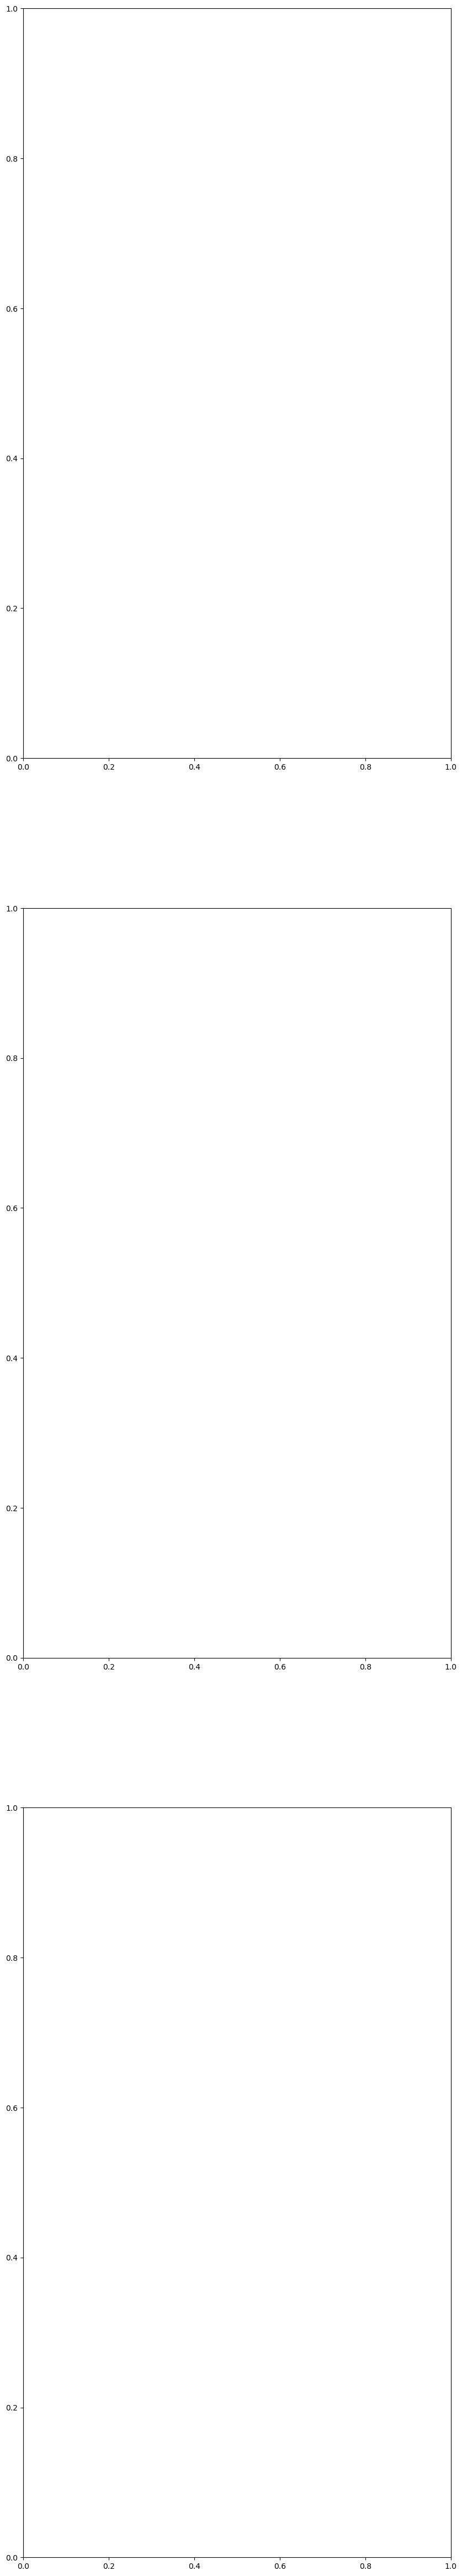

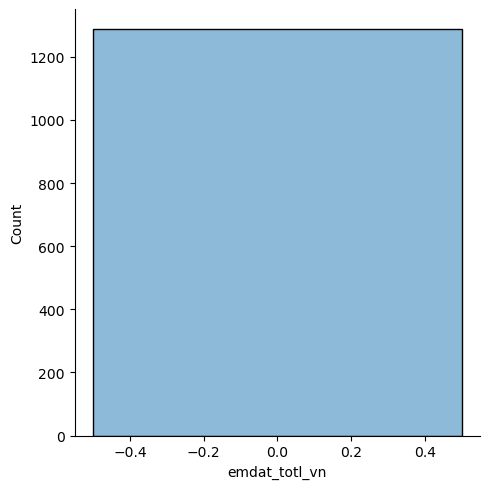

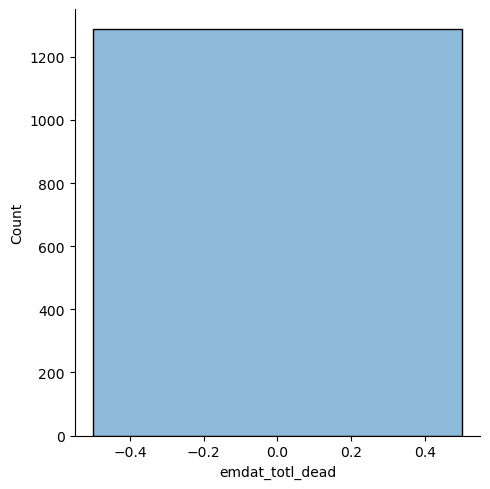

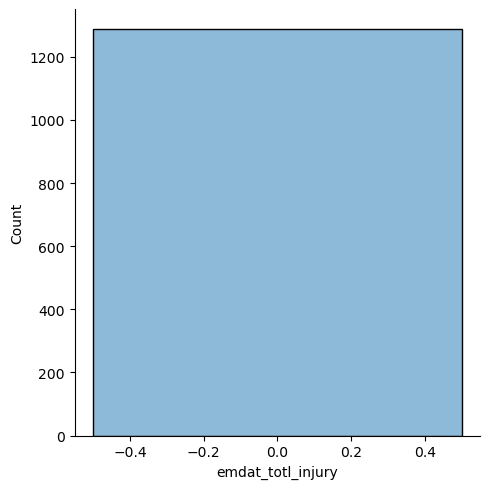

In [67]:
#example distribution plot with kernel densities
%matplotlib inline 
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.displot(data_vn['emdat_totl_vn'], kde=True, ax= axes[0])
sns.displot(data_vn['emdat_totl_dead'], kde=True, ax= axes[1])
sns.displot(data_vn['emdat_totl_injury'], kde=True, ax= axes[2])
plt.savefig('emdat1.png')

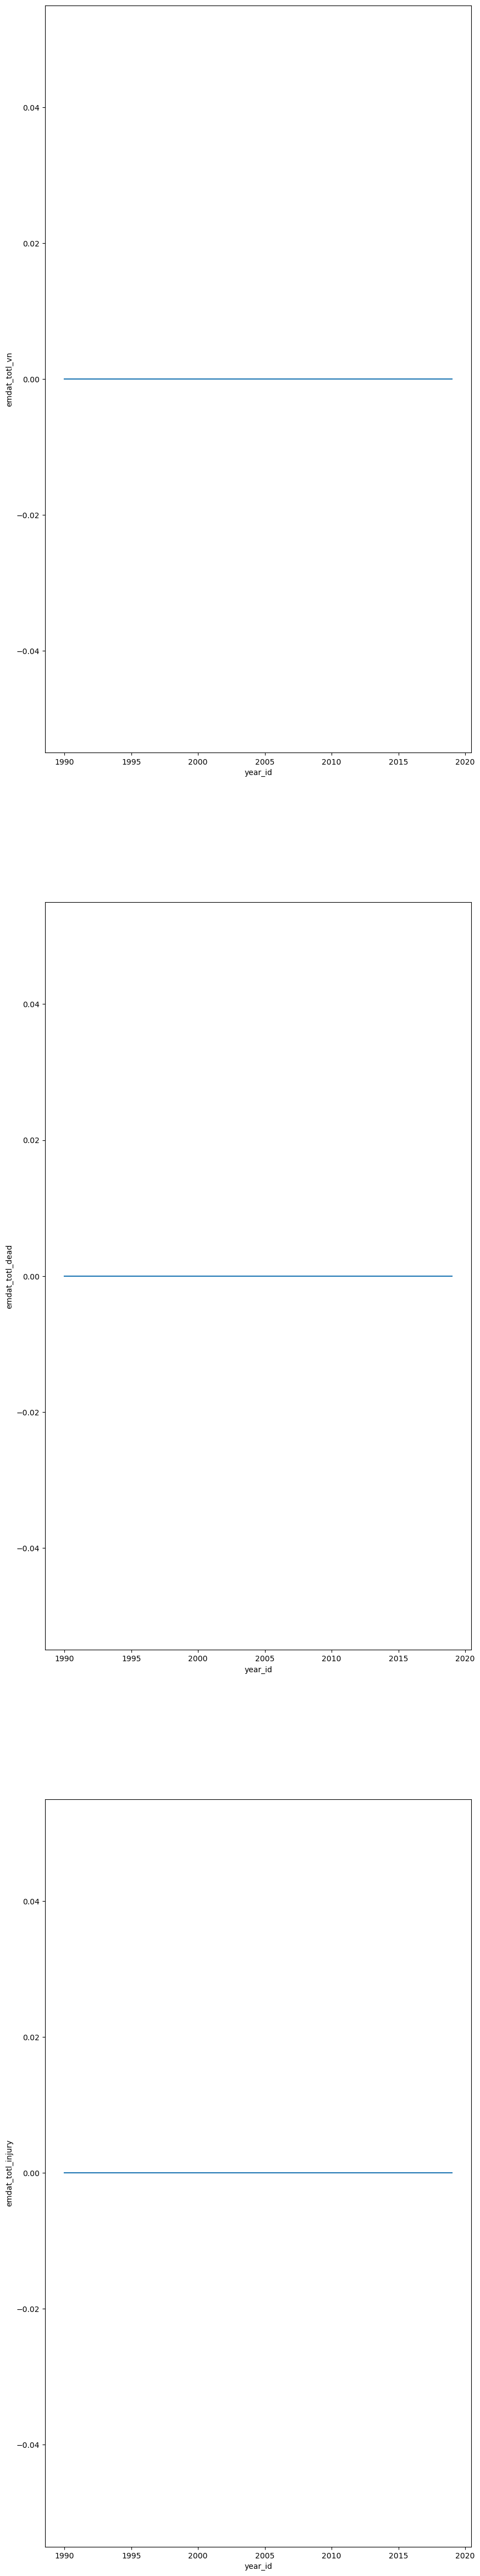

In [68]:
#create trendlines
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.lineplot(x='year_id',y='emdat_totl_vn',data=data_vn,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='emdat_totl_dead',data=data_vn,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='emdat_totl_injury',data=data_vn,err_style='bars',ax=axes[2])
plt.savefig('emdat2.pdf')

In [ ]:
#inspect missingness
##all values are zero

In [ ]:
data_vn.to_csv('data_vn.csv')

# 6. Universal Health Care Coverage (UHC) 

In [71]:
data_uhc = pd.read_csv('who_uhc.csv')

In [72]:
print(data_uhc.dtypes)
print(data_uhc.columns)
print(data_uhc.describe(include='all'))

Unnamed: 0                             int64
who_iso3                              object
who_year_id                            int64
who_healthcare_coverage_index        float64
who_healthcare_availability_score    float64
dtype: object
Index(['Unnamed: 0', 'who_iso3', 'who_year_id',
       'who_healthcare_coverage_index', 'who_healthcare_availability_score'],
      dtype='object')
         Unnamed: 0 who_iso3  who_year_id  who_healthcare_coverage_index  \
count   1254.000000     1254  1254.000000                    1254.000000   
unique          NaN      209          NaN                            NaN   
top             NaN      142          NaN                            NaN   
freq            NaN        6          NaN                            NaN   
mean     626.500000      NaN  2011.000000                      57.612068   
std      362.142928      NaN     6.760408                      17.877693   
min        0.000000      NaN  2000.000000                      13.663830   
25%  

In [73]:
data_uhc = data_uhc.rename(columns={'who_iso3':'iso', 'who_year_id':'year_id','who_healthcare_coverage_index':'uhc_index', 
                            'who_healthcare_availability_score':'uhc_available_score'})

In [74]:
data_uhc

,Unnamed: 0,iso,year_id,uhc_index,uhc_available_score
0,0,142,2000,40.61875,40.61875
1,1,142,2005,46.79220,46.79220
2,2,142,2010,56.34250,56.34250
3,3,142,2015,63.23112,63.23112
4,4,142,2017,65.85437,65.85437
...,...,...,...,...,...
1249,1249,ZWE,2005,33.02815,33.02815
1250,1250,ZWE,2010,46.89234,46.89234
1251,1251,ZWE,2015,54.87214,54.87214
1252,1252,ZWE,2017,55.71077,55.71077


In [75]:
data_uhc = data_uhc.loc[data_uhc['iso'].isin(['BWA',
 'MRT',
 'CPV',
 'UGA',
 'ZMB',
 'NER',
 'BDI',
 'TCD',
 'SOM',
 'AGO',
 'CAF',
 'MDG',
 'COG',
 'COM',
 'DJI',
 'MOZ',
 'CIV',
 'NGA',
 'BEN',
 'SWZ',
 'MWI',
 'GMB',
 'ERI',
 'ZWE',
 'GNQ',
 'GAB',
 'RWA',
 'GIN',
 'GHA',
 'CMR',
 'LSO',
 'SEN',
 'STP',
 'SLE',
 'GNB',
 'KEN',
 'TGO',
 'ETH',
 'BFA',
 'LBR',
 'NAM',
 'ZAF','MLI'])]
data_uhc = data_uhc.groupby(['iso','year_id']).sum().reset_index()
display(data_uhc)

,iso,year_id,Unnamed: 0,uhc_index,uhc_available_score
0,AGO,2000,42,21.98858,21.98858
1,AGO,2005,43,23.13457,23.13457
2,AGO,2010,44,31.94956,31.94956
3,AGO,2015,45,36.67979,36.67979
4,AGO,2017,46,38.52513,38.52513
...,...,...,...,...,...
253,ZWE,2005,1249,33.02815,33.02815
254,ZWE,2010,1250,46.89234,46.89234
255,ZWE,2015,1251,54.87214,54.87214
256,ZWE,2017,1252,55.71077,55.71077


In [76]:
## only years from 1990 onwards
data_uhc = data_uhc.loc[data_uhc['year_id'] >= 1990]

In [77]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_uhc.columns:
    pct_missing= np.mean(data_uhc[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,iso,0.0
1,year_id,0.0
2,Unnamed: 0,0.0
3,uhc_index,0.0
4,uhc_available_score,0.0


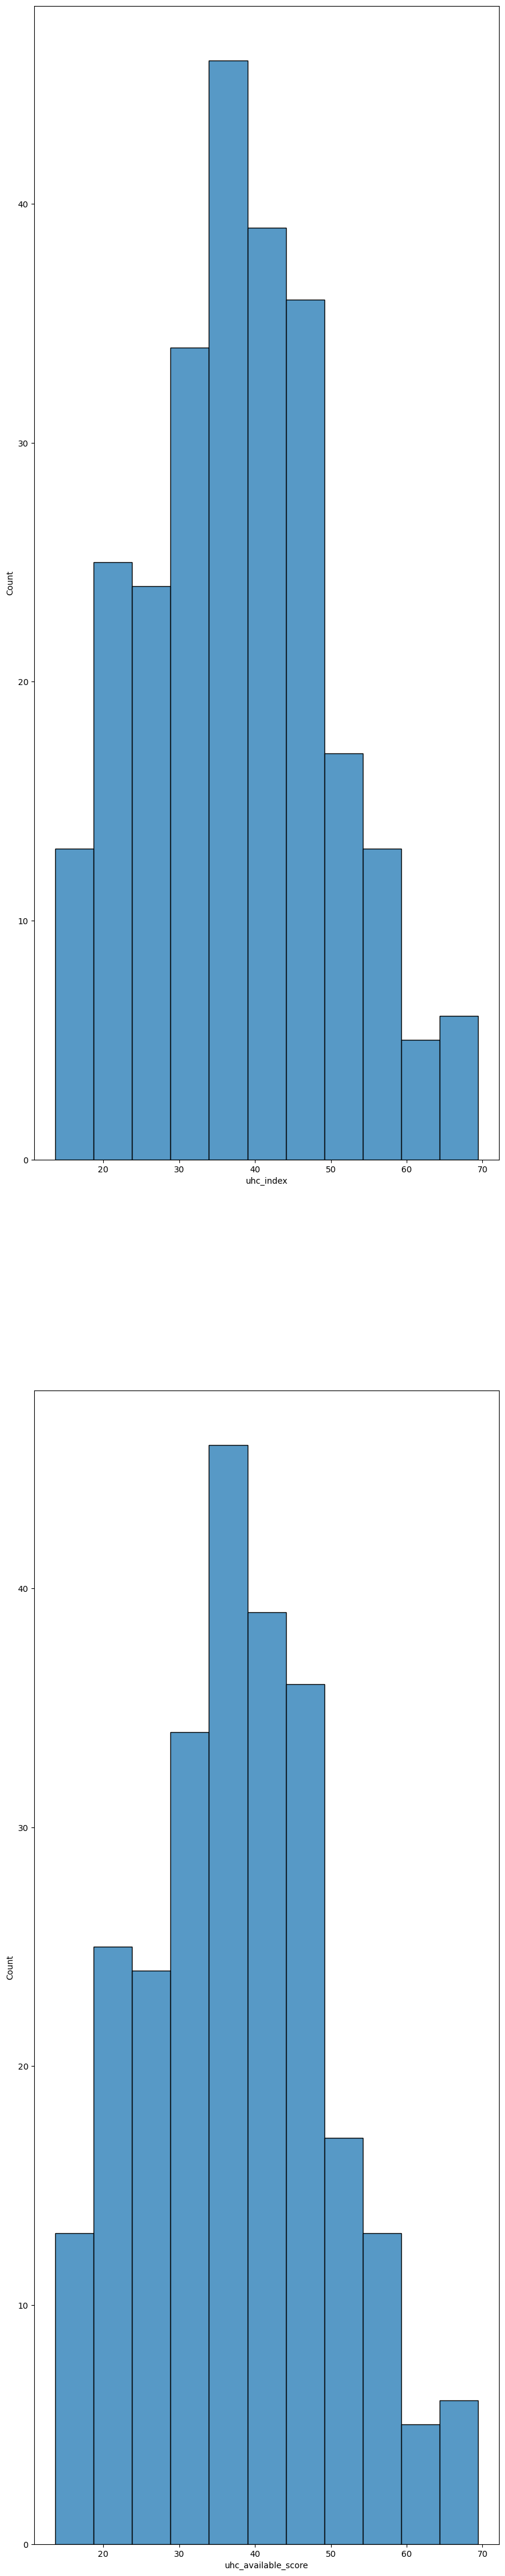

In [78]:
#get a histogram
#create histograms for all mean variables
figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_uhc['uhc_index'],ax=axes[0])
sns.histplot(data_uhc['uhc_available_score'],ax=axes[1])

plt.savefig('uhc1.png')

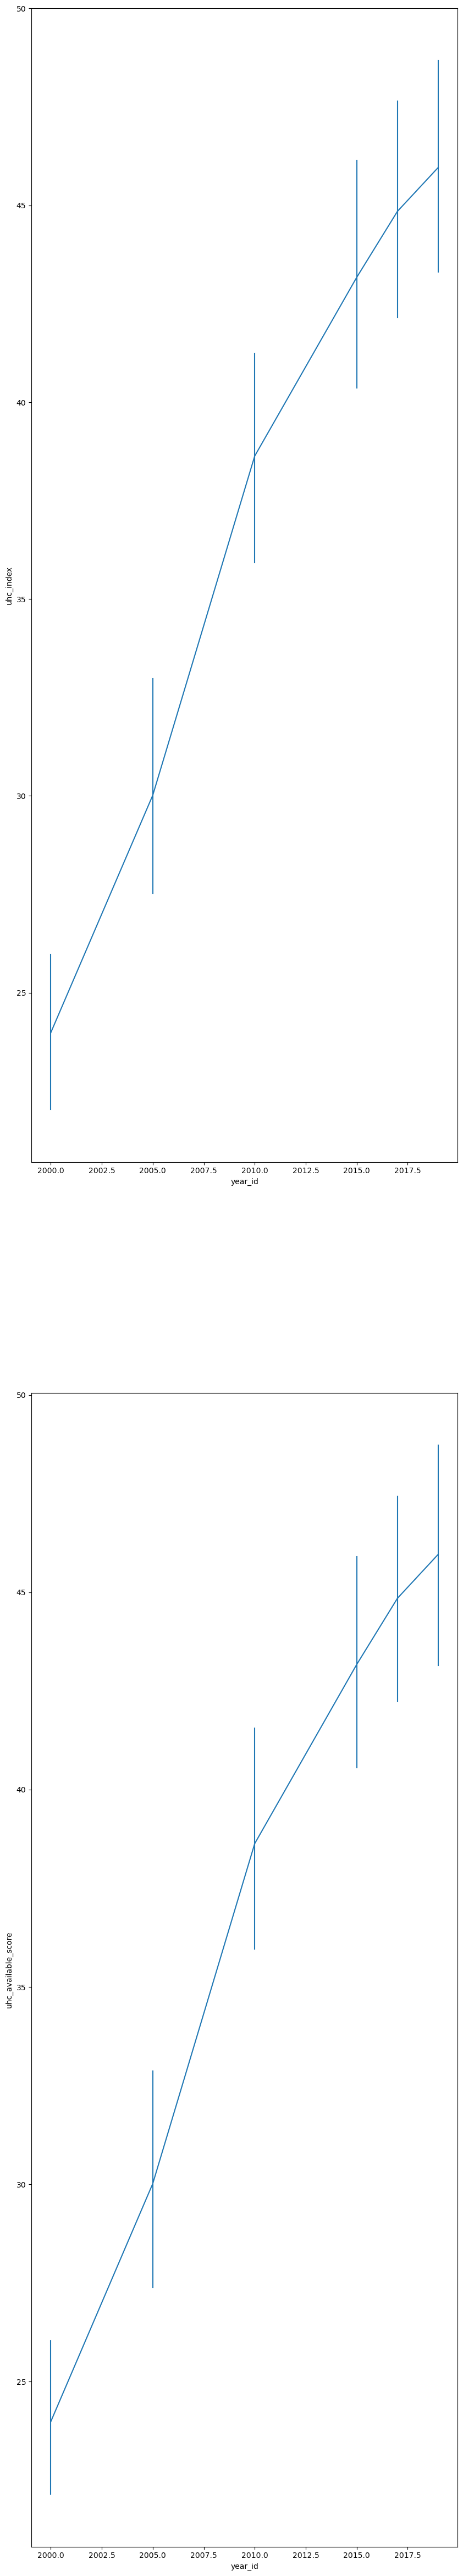

In [79]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))

sns.lineplot(x='year_id',y='uhc_index',data=data_uhc,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='uhc_available_score',data=data_uhc,err_style='bars',ax=axes[1])

plt.savefig('uhc2.png')

In [80]:
data_uhc.groupby(['iso','year_id']).sum().reset_index()

,iso,year_id,Unnamed: 0,uhc_index,uhc_available_score
0,AGO,2000,42,21.98858,21.98858
1,AGO,2005,43,23.13457,23.13457
2,AGO,2010,44,31.94956,31.94956
3,AGO,2015,45,36.67979,36.67979
4,AGO,2017,46,38.52513,38.52513
...,...,...,...,...,...
253,ZWE,2005,1249,33.02815,33.02815
254,ZWE,2010,1250,46.89234,46.89234
255,ZWE,2015,1251,54.87214,54.87214
256,ZWE,2017,1252,55.71077,55.71077


In [81]:
#save to csv
data_uhc.to_csv('data_uhc.csv')